In [342]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [343]:
data = pd.read_csv('./datasets/train_data.csv')
data.head()

,text,label
0,The fact that every single major department of...,0
1,He added that himself and families and women i...,0
2,"BTW , here 's a statement which our apex court...",0
3,Hospitals fill as Rohingya refugees shiver thr...,1
4,But in pregnant women it can cause microcephal...,0


Bag of words model
Naive Bayesian Classification

In [344]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
# X = cv.fit_transform(data['text']).toarray()
# y = data['label'].values

# train test split
from sklearn.model_selection import train_test_split


In [345]:
# train_data = pd.read_csv('./datasets/train_data.csv')
test_data = pd.read_csv('./datasets/test_data.csv')
train_data = pd.read_csv('./datasets/train_data.csv')
augmented_data1 = pd.read_csv('./datasets/augmented_data_label_1_parrot.csv')
augmented_data2 = pd.read_csv('./datasets/augmented_data_label_1_pegasus.csv')
train_data = pd.concat([train_data, augmented_data1, augmented_data2], ignore_index=True)
# find the null values and remove them
print(train_data.isnull().sum())
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
# find the null values and remove them
print(test_data.isnull().sum())
X_train, y_train = train_data['text'], train_data['label']
X_test, y_test = test_data['text'], test_data['label']
test_data.dropna(inplace=True)
val_data = pd.read_csv('./datasets/val_data.csv')
val_data.dropna(inplace=True)
X_val, y_val = val_data['text'], val_data['label']

text     0
label    0
dtype: int64
text     0
label    0
dtype: int64


In [346]:


def train(X_train, y_train, X_test, y_test,cv,  model):
    model.fit(X_train, y_train)
    # test
    print("accuracy: ", model.score(X_test, y_test))
    # F1 score
    from sklearn.metrics import f1_score
    y_pred = model.predict(X_test)
    print("F1 score: ", f1_score(y_test, y_pred))
    # print the weights
    if(hasattr(model, 'coef_')):
        # print(model.coef_)
        #save the weights
        # np.savetxt('./weights_log.txt', model.coef_)
        weight = model.coef_
        # filter the most important words
        idx = np.argsort(weight, axis=1)
        # print(idx)
        # get the words
        words = cv.get_feature_names_out()
        pred_min = []
        weight_min = []
        pred_max = []
        weight_max = []

        # print(words)
        # print the most important words
        for i in range(len(idx)):
            print("class ", i)
            for j in range(1, 20):
                pred_min.append(words[idx[i][-j]])
                weight_min.append(weight[i,idx[i][-j]])

            print()
            for j in range(1, 20):
                pred_max.append(words[idx[i][j]])
                weight_max.append(weight[i,idx[i][j]])
        plt.figure(figsize=(20, 10))
        plt.bar(pred_min, weight_min,  label='max')
        plt.bar(pred_max, weight_max,  label='min')
        #rotate the x axis labels
        plt.xticks(rotation=90)
        
        plt.legend()
        # print the misclassified samples
        for i in range(len(y_pred)):
            if(y_pred[i] != y_test[i]):
                #transform the text to the original form
                t = cv.inverse_transform(X_test[i])
                print("class: ", y_test[i], "pred: ", y_pred[i], "text: ", t)
                break

        

    if(hasattr(model, 'feature_log_prob_')):
        # print(model.feature_log_prob_)
        #save the weights
        # np.savetxt('./weights_nb.txt', model.feature_log_prob_)
        weight = model.feature_log_prob_
        # get the index of the most important words
        idx = np.argsort(weight, axis=1)
        # print(idx)
        # get the words
        words = cv.get_feature_names_out()
        # print(words)
        # print the most important words
        pred_min = []
        weight_min = []
        pred_max = []
        weight_max = []
        for i in range(len(idx)):
            print("class ", i)
            for j in range(1, 20):
                pred_min.append(words[idx[i][-j]])
                weight_min.append(weight[i,idx[i][-j]])
            for j in range(1, 20):
                pred_max.append(words[idx[i][j]])
                weight_max.append(weight[i,idx[i][j]])
        # plot the most important words as the x axis and the related weights as the y axis
        plt.figure(figsize=(20, 10))
        plt.bar(pred_min, weight_min,  label='max')
 
        plt.bar(pred_max, weight_max,  label='min')
               #rotate the x axis labels
        plt.xticks(rotation=90)
        plt.legend()
        plt.show()
        

        # print the misclassified samples
        for i in range(len(y_pred)):
            if(y_pred[i] != y_test[i]):
                #transform the text to the original form
                t = cv.inverse_transform(X_test[i])
                print("class: ", y_test[i], "pred: ", y_pred[i], "text: ", t)
                break



### Baseline1 Naive Bayes

In [347]:
# naive bayes

from sklearn.naive_bayes import MultinomialNB
def NB(X_train, y_train, X_test, y_test, X_val, y_val, cv):
    model = MultinomialNB()
    X_train = cv.fit_transform(X_train)
    print(cv.get_feature_names_out())
    X_test = cv.transform(X_test)
    X_val = cv.transform(X_val)
    train(X_train, y_train, X_test, y_test,cv, model)
    train(X_train, y_train, X_val, y_val,cv, model)

['00' '000' '000m' ... 'zuri' 'zurita' 'zyngier']
accuracy:  0.8524355300859598
F1 score:  0.3326133909287257
class  0
class  1


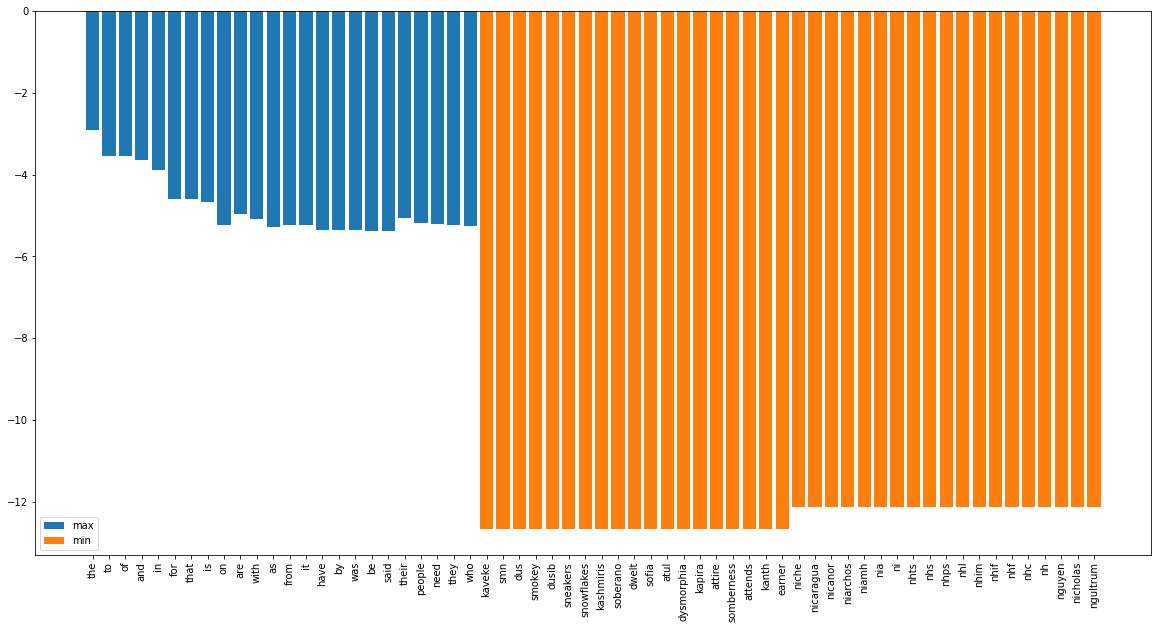

class:  1 pred:  0 text:  [array(['alone', 'anywhere', 'be', 'do', 'in', 'let', 'many', 'refugees',
       'resettled', 'the', 'to', 'us', 'want'], dtype='<U21')]
accuracy:  0.8723150357995226
F1 score:  0.4780487804878049
class  0
class  1


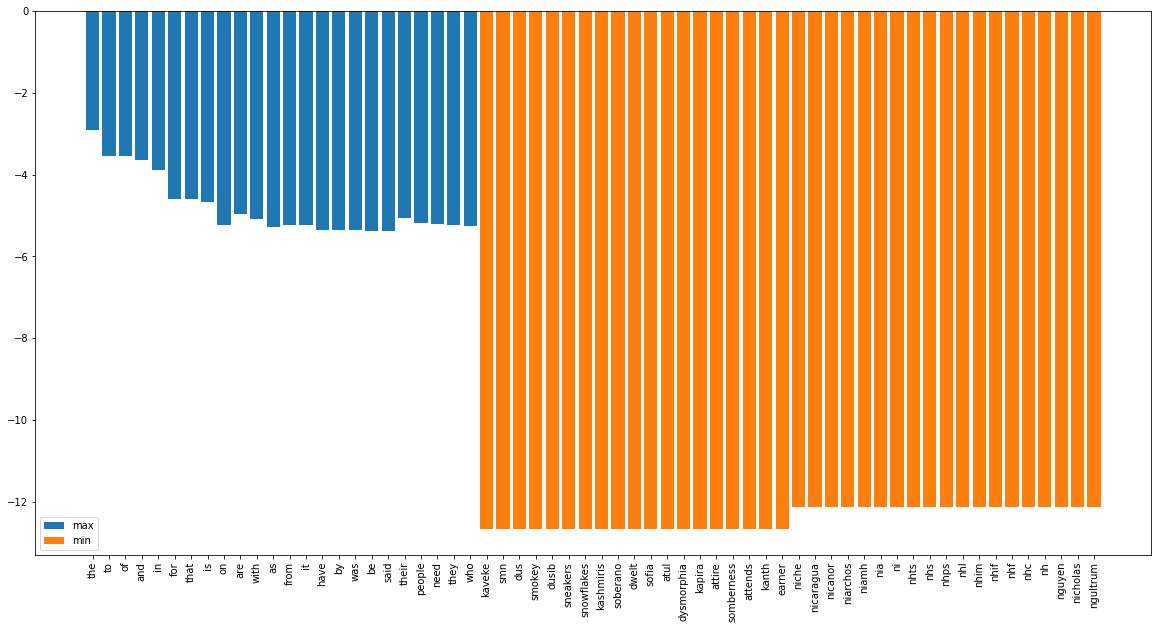

class:  0 pred:  1 text:  [array(['able', 'be', 'could', 'he', 'help', 'in', 'last', 'liked', 'lim',
       'ms', 'need', 'people', 'said', 'so', 'someone', 'the', 'this',
       'thought', 'time', 'to'], dtype='<U21')]


In [348]:
NB(X_train, y_train, X_test, y_test, X_val, y_val, cv)

### Baseline 2: Logistic Regression

In [349]:
# logistic regression
from sklearn.linear_model import LogisticRegression
def LR(X_train, y_train, X_test, y_test, X_val, y_val, cv):
    model = LogisticRegression()
    X_train = cv.fit_transform(X_train)
    X_test = cv.transform(X_test)
    X_val = cv.transform(X_val)
    train(X_train, y_train, X_test, y_test, cv,model)
    train(X_train, y_train, X_val, y_val, cv, model)

d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.8486150907354346
F1 score:  0.30022075055187636
class  0

class:  1 pred:  0 text:  [array(['and', 'angela', 'are', 'budding', 'build', 'chefs', 'desperately',
       'either', 'enable', 'fred', 'hand', 'helping', 'homeless',
       'housed', 'in', 'kitchen', 'like', 'lives', 'need', 'of', 'or',
       're', 'recently', 'shattered', 'the', 'their', 'them', 'to',
       'winston'], dtype='<U21')]


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.863961813842482
F1 score:  0.37362637362637363
class  0

class:  0 pred:  1 text:  [array(['able', 'be', 'could', 'he', 'help', 'in', 'last', 'liked', 'lim',
       'ms', 'need', 'people', 'said', 'so', 'someone', 'the', 'this',
       'thought', 'time', 'to'], dtype='<U21')]


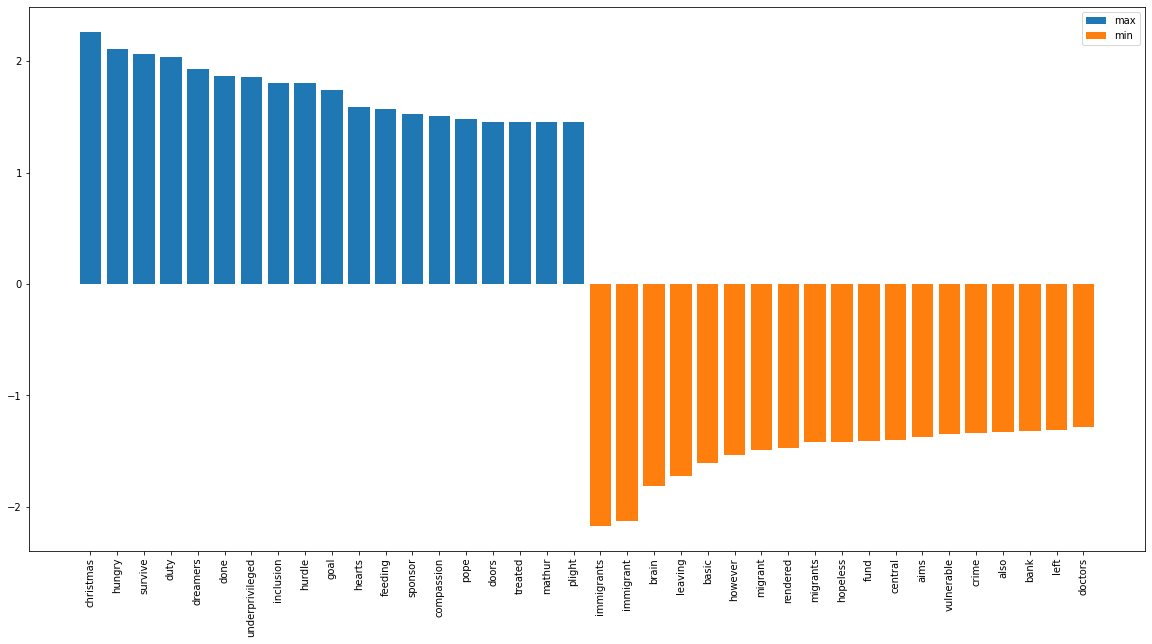

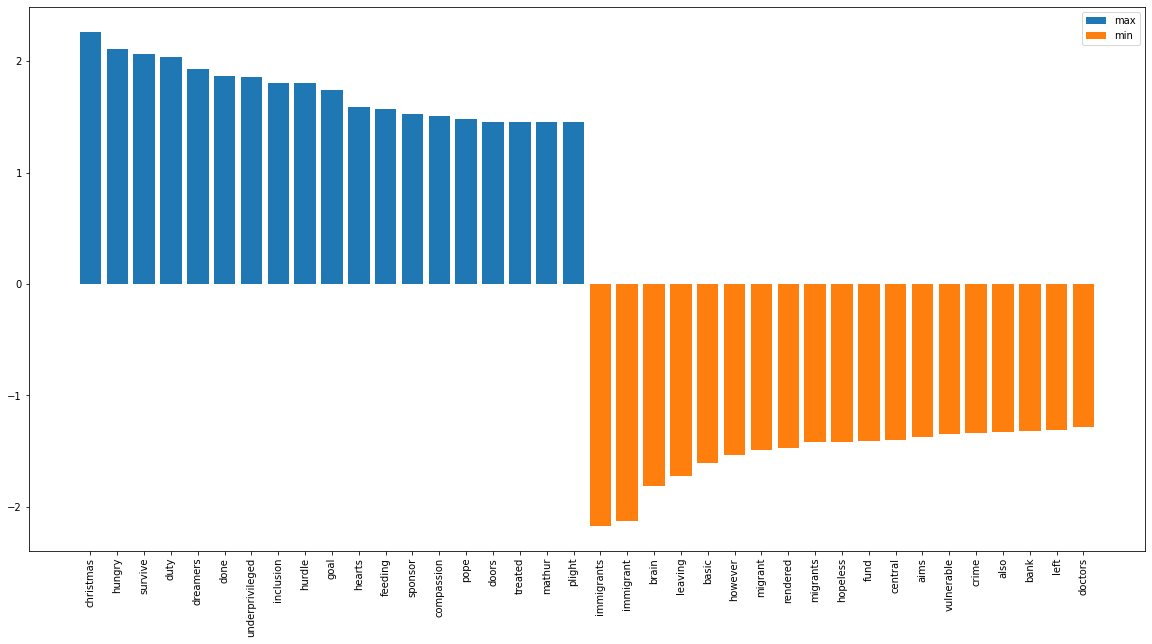

In [350]:
LR(X_train, y_train, X_test, y_test, X_val, y_val, cv)

In [351]:
train_data = pd.read_csv('./datasets/train_data.csv')
test_data = pd.read_csv('./datasets/test_data.csv')
# train_data = pd.read_csv('./datasets/train_data_balanced.csv')
# find the null values and remove them
print(train_data.isnull().sum())
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
# find the null values and remove them
print(test_data.isnull().sum())
X_train, y_train = train_data['text'], train_data['label']
X_test, y_test = test_data['text'], test_data['label']
test_data.dropna(inplace=True)
val_data = pd.read_csv('./datasets/val_data.csv')
val_data.dropna(inplace=True)
X_val, y_val = val_data['text'], val_data['label']


text     0
label    0
dtype: int64
text     0
label    0
dtype: int64


### Original DataSet without data augumentation

['00' '000' '000m' ... 'zuri' 'zurita' 'zyngier']
accuracy:  0.9049665711556829
F1 score:  0.06572769953051642
class  0
class  1


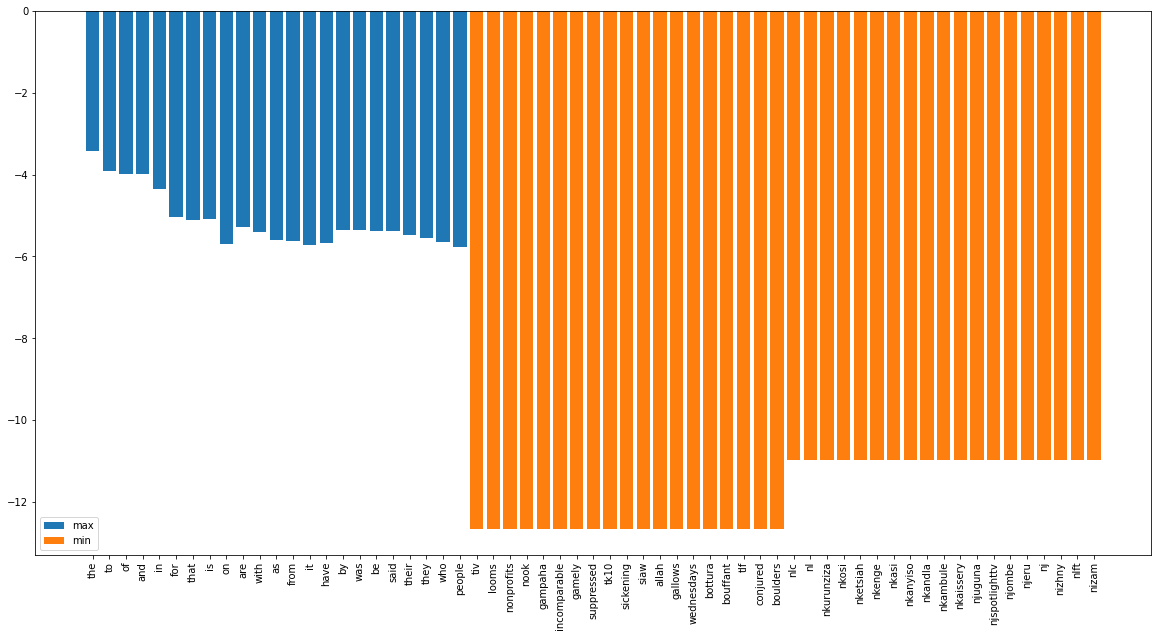

class:  1 pred:  0 text:  [array(['about', 'access', 'adoption', 'also', 'an', 'and', 'are',
       'benefit', 'by', 'can', 'child', 'communicate', 'could',
       'counseling', 'developing', 'either', 'feelings', 'for', 'from',
       'help', 'hopeless', 'in', 'is', 'know', 'needs', 'normal', 'not',
       'of', 'or', 'others', 'parenting', 'perspective', 'plan',
       'provide', 'put', 'receiving', 'resources', 'situation', 'someone',
       'support', 'that', 'the', 'their', 'them', 'they', 'understand',
       'we', 'who', 'with'], dtype='<U21')]
accuracy:  0.89618138424821
F1 score:  0.02247191011235955
class  0
class  1


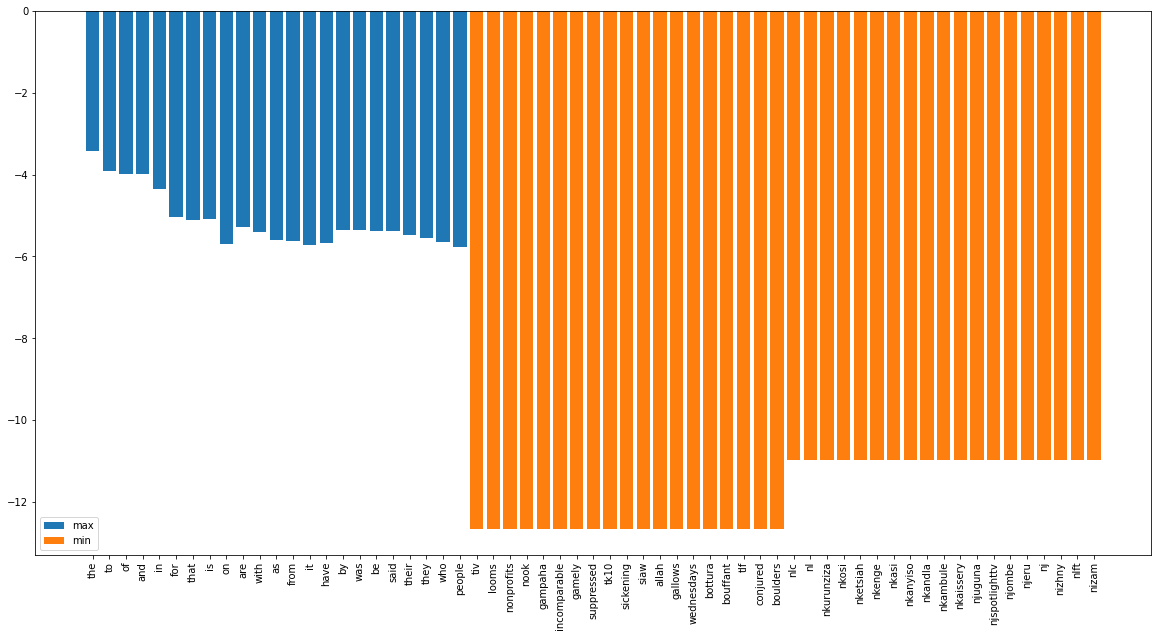

class:  1 pred:  0 text:  [array(['about', 'and', 'as', 'at', 'betty', 'children', 'could', 'each',
       'face', 'from', 'her', 'how', 'initiative', 'is', 'just',
       'listening', 'lit', 'passionate', 'protect', 'question', 'seeks',
       'she', 'tell', 'that', 'this', 'thrown', 'to', 'up', 'vulnerable',
       'was', 'you', 'young'], dtype='<U21')]


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.9001910219675263
F1 score:  0.2614840989399293
class  0

class:  1 pred:  0 text:  [array(['alone', 'anywhere', 'be', 'do', 'in', 'let', 'many', 'refugees',
       'resettled', 'the', 'to', 'us', 'want'], dtype='<U21')]


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.9033412887828163
F1 score:  0.3305785123966942
class  0

class:  1 pred:  0 text:  [array(['about', 'and', 'as', 'at', 'betty', 'children', 'could', 'each',
       'face', 'from', 'her', 'how', 'initiative', 'is', 'just',
       'listening', 'lit', 'passionate', 'protect', 'question', 'seeks',
       'she', 'tell', 'that', 'this', 'thrown', 'to', 'up', 'vulnerable',
       'was', 'you', 'young'], dtype='<U21')]


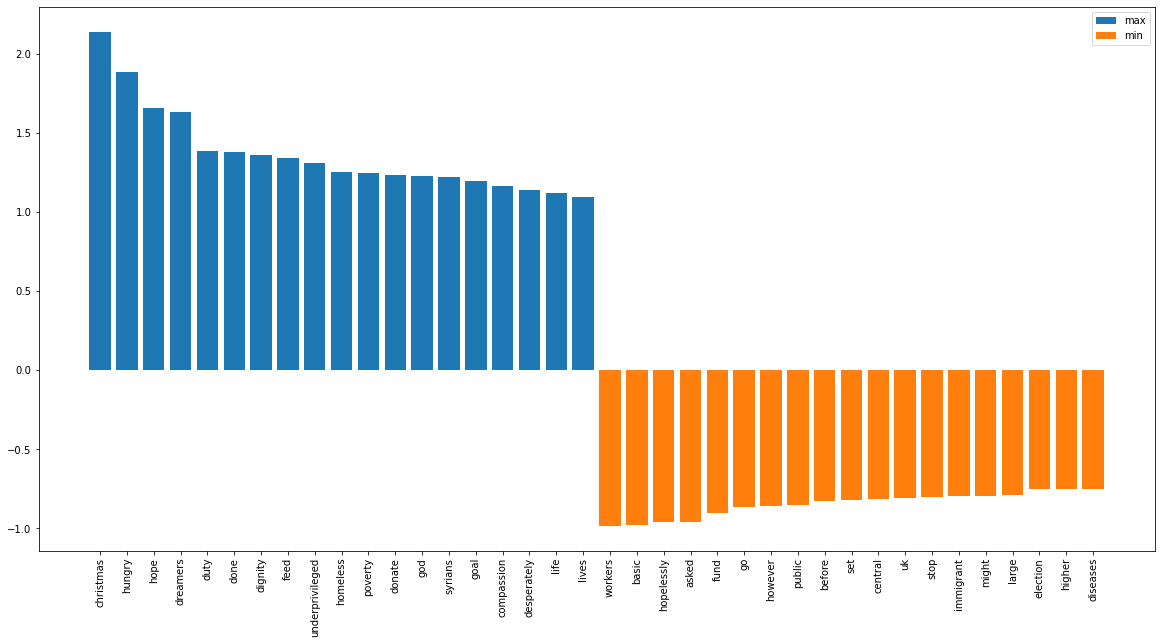

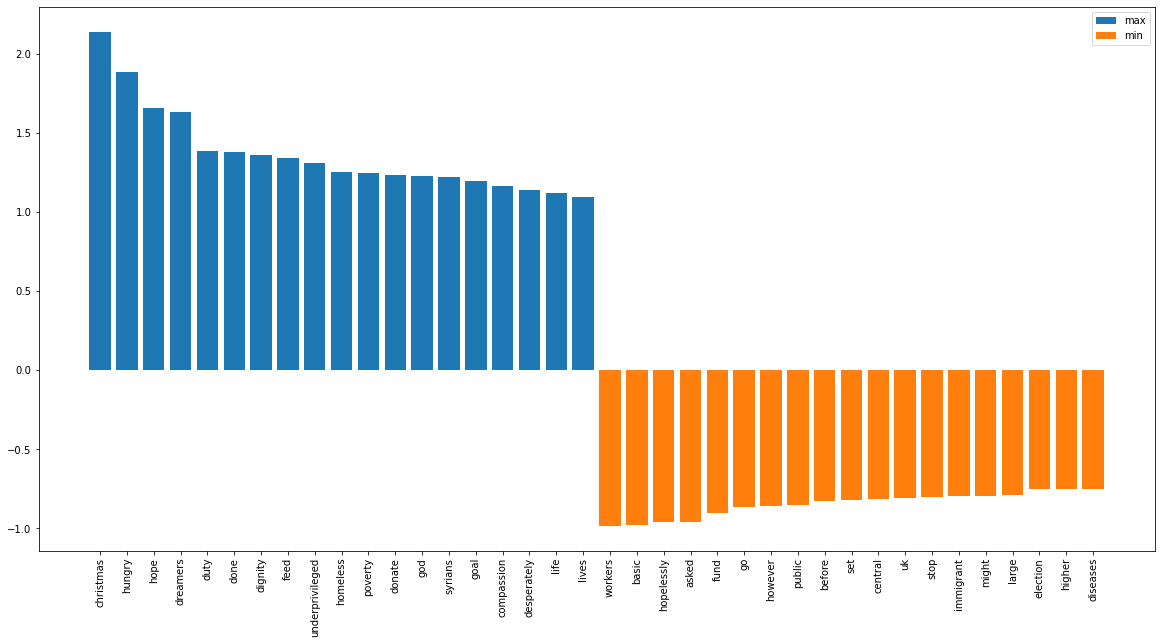

In [352]:
NB(X_train, y_train, X_test, y_test, X_val, y_val, cv)
LR(X_train, y_train, X_test, y_test, X_val, y_val, cv)

# Countervectorizer

['00' '000' '000m' ... 'zuri' 'zurita' 'zyngier']
accuracy:  0.9049665711556829
F1 score:  0.06572769953051642
class  0
class  1


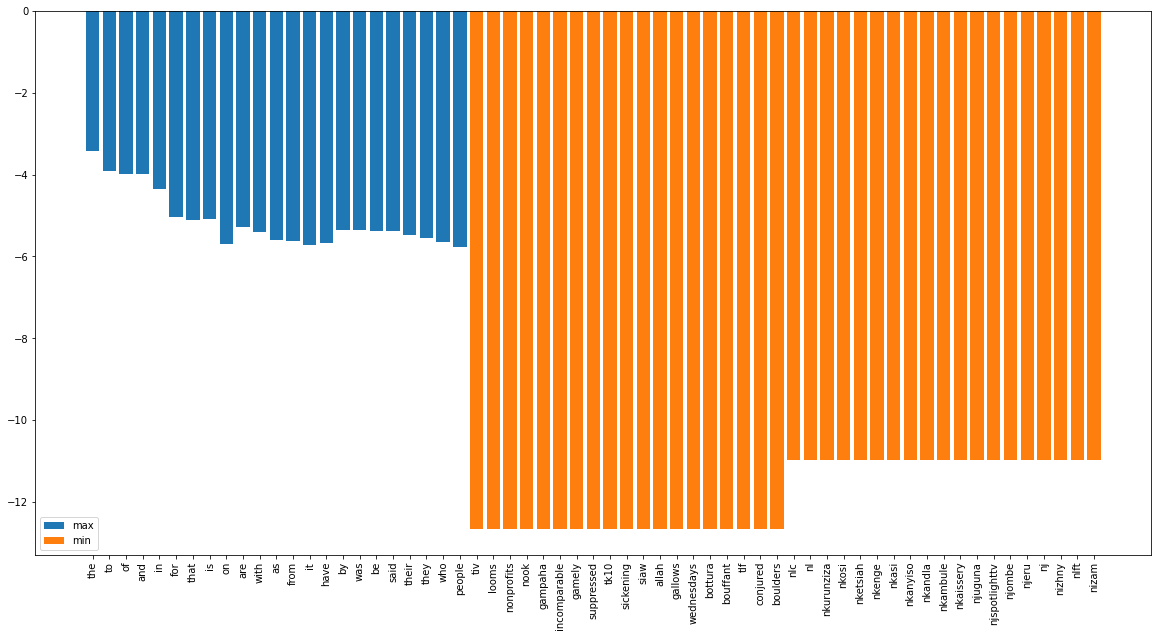

class:  1 pred:  0 text:  [array(['about', 'access', 'adoption', 'also', 'an', 'and', 'are',
       'benefit', 'by', 'can', 'child', 'communicate', 'could',
       'counseling', 'developing', 'either', 'feelings', 'for', 'from',
       'help', 'hopeless', 'in', 'is', 'know', 'needs', 'normal', 'not',
       'of', 'or', 'others', 'parenting', 'perspective', 'plan',
       'provide', 'put', 'receiving', 'resources', 'situation', 'someone',
       'support', 'that', 'the', 'their', 'them', 'they', 'understand',
       'we', 'who', 'with'], dtype='<U21')]
accuracy:  0.89618138424821
F1 score:  0.02247191011235955
class  0
class  1


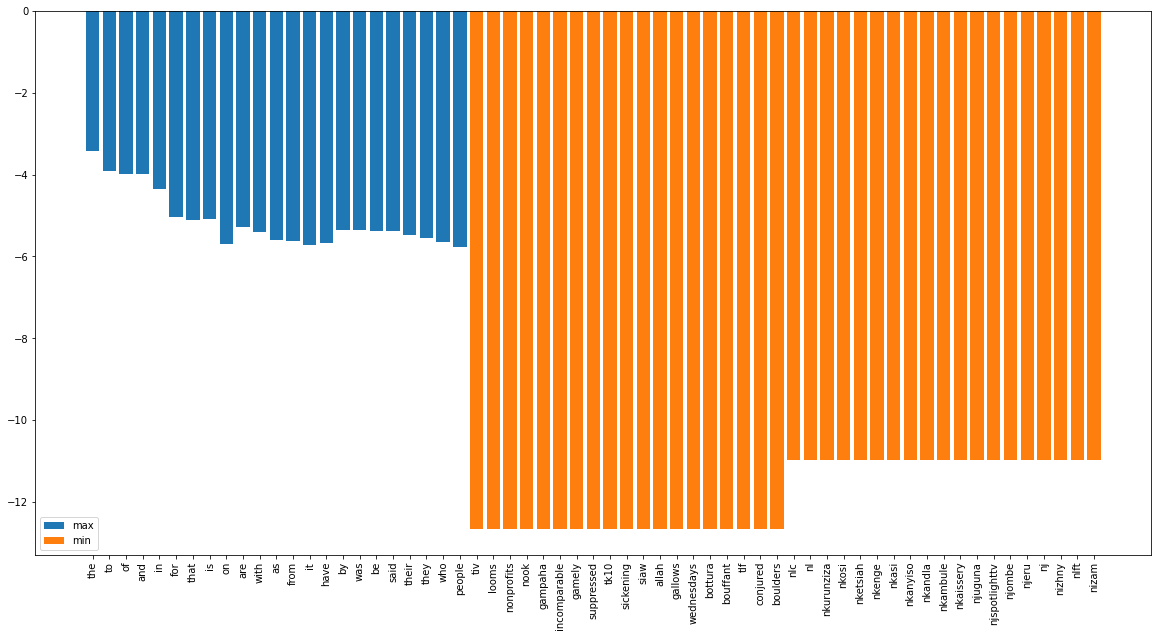

class:  1 pred:  0 text:  [array(['about', 'and', 'as', 'at', 'betty', 'children', 'could', 'each',
       'face', 'from', 'her', 'how', 'initiative', 'is', 'just',
       'listening', 'lit', 'passionate', 'protect', 'question', 'seeks',
       'she', 'tell', 'that', 'this', 'thrown', 'to', 'up', 'vulnerable',
       'was', 'you', 'young'], dtype='<U21')]


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.9001910219675263
F1 score:  0.2614840989399293
class  0

class:  1 pred:  0 text:  [array(['alone', 'anywhere', 'be', 'do', 'in', 'let', 'many', 'refugees',
       'resettled', 'the', 'to', 'us', 'want'], dtype='<U21')]


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.9033412887828163
F1 score:  0.3305785123966942
class  0

class:  1 pred:  0 text:  [array(['about', 'and', 'as', 'at', 'betty', 'children', 'could', 'each',
       'face', 'from', 'her', 'how', 'initiative', 'is', 'just',
       'listening', 'lit', 'passionate', 'protect', 'question', 'seeks',
       'she', 'tell', 'that', 'this', 'thrown', 'to', 'up', 'vulnerable',
       'was', 'you', 'young'], dtype='<U21')]


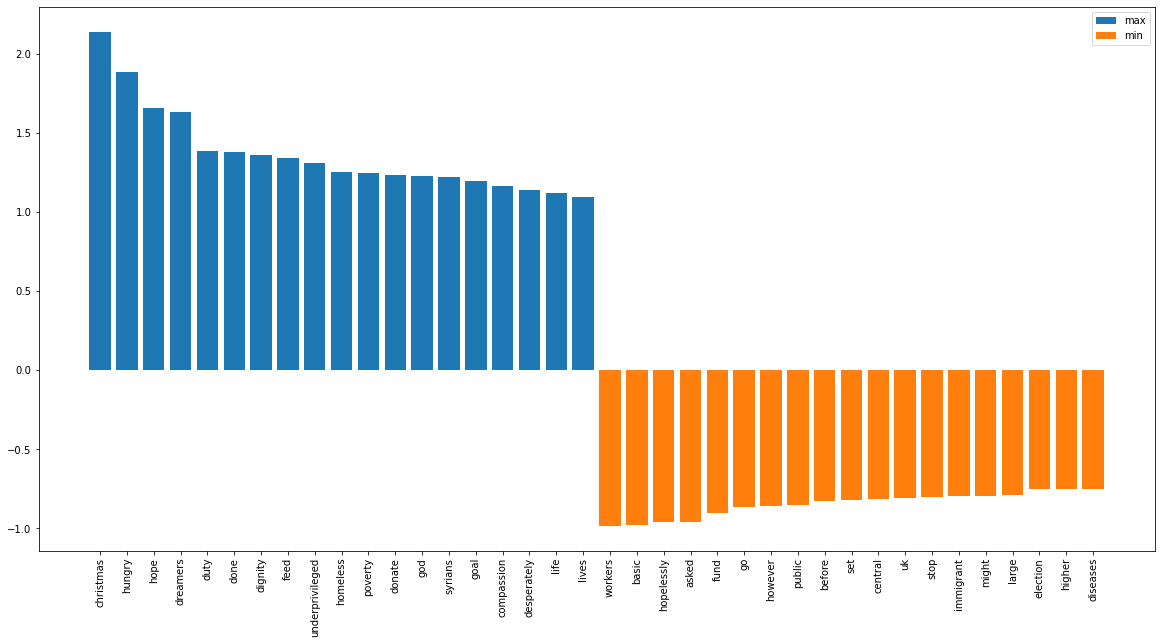

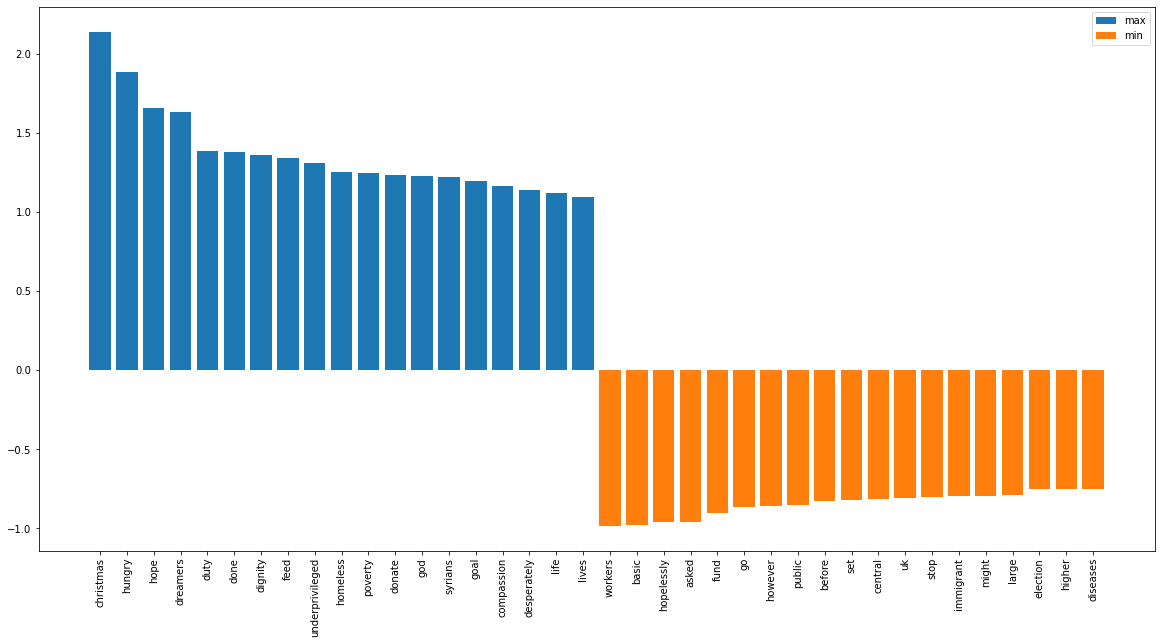

In [353]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
NB(X_train, y_train, X_test, y_test, X_val, y_val, vectorizer)
LR(X_train, y_train, X_test, y_test, X_val, y_val, vectorizer)


# TF-IDF


['00' '000' '000m' ... 'zuri' 'zurita' 'zyngier']
accuracy:  0.9049665711556829
F1 score:  0.0
class  0
class  1


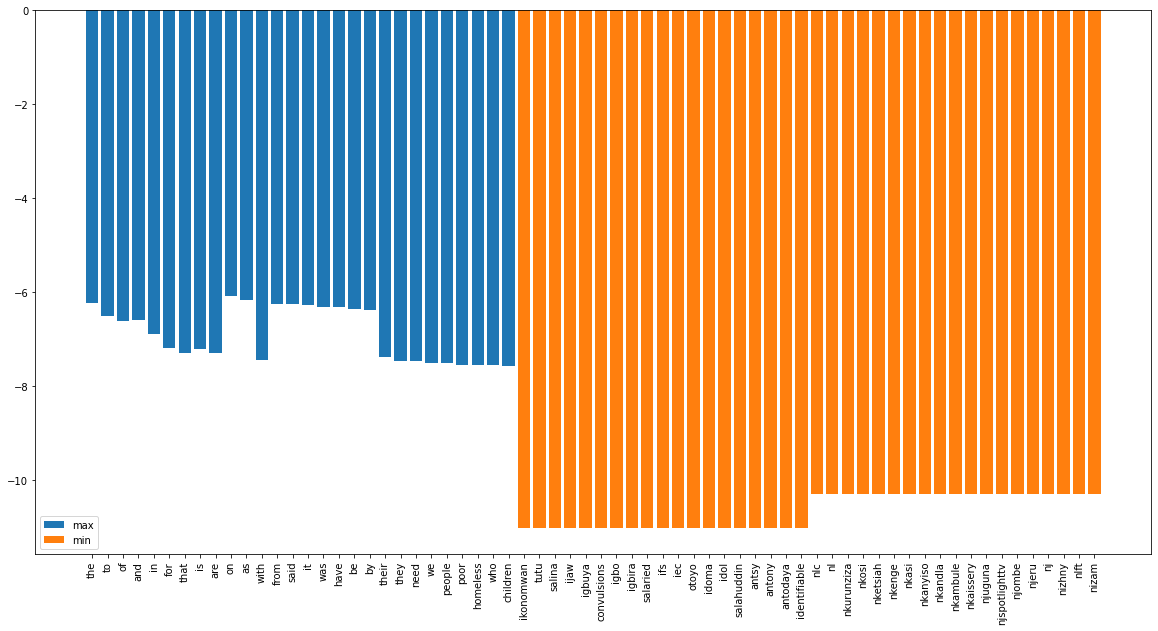

class:  1 pred:  0 text:  [array(['with', 'who', 'we', 'understand', 'they', 'them', 'their', 'the',
       'that', 'support', 'someone', 'situation', 'resources',
       'receiving', 'put', 'provide', 'plan', 'perspective', 'parenting',
       'others', 'or', 'of', 'not', 'normal', 'needs', 'know', 'is', 'in',
       'hopeless', 'help', 'from', 'for', 'feelings', 'either',
       'developing', 'counseling', 'could', 'communicate', 'child', 'can',
       'by', 'benefit', 'are', 'and', 'an', 'also', 'adoption', 'access',
       'about'], dtype='<U21')]
accuracy:  0.8949880668257757
F1 score:  0.0
class  0
class  1


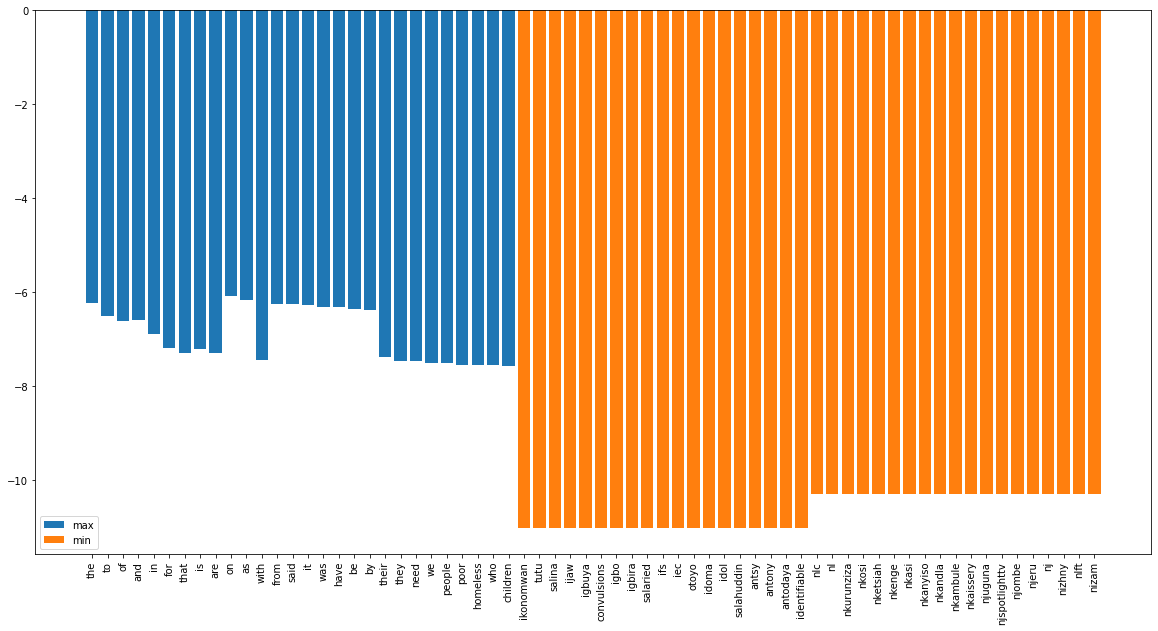

class:  1 pred:  0 text:  [array(['young', 'you', 'was', 'vulnerable', 'up', 'to', 'thrown', 'this',
       'that', 'tell', 'she', 'seeks', 'question', 'protect',
       'passionate', 'lit', 'listening', 'just', 'is', 'initiative',
       'how', 'her', 'from', 'face', 'each', 'could', 'children', 'betty',
       'at', 'as', 'and', 'about'], dtype='<U21')]
accuracy:  0.9049665711556829
F1 score:  0.02926829268292683
class  0

class:  1 pred:  0 text:  [array(['with', 'who', 'we', 'understand', 'they', 'them', 'their', 'the',
       'that', 'support', 'someone', 'situation', 'resources',
       'receiving', 'put', 'provide', 'plan', 'perspective', 'parenting',
       'others', 'or', 'of', 'not', 'normal', 'needs', 'know', 'is', 'in',
       'hopeless', 'help', 'from', 'for', 'feelings', 'either',
       'developing', 'counseling', 'could', 'communicate', 'child', 'can',
       'by', 'benefit', 'are', 'and', 'an', 'also', 'adoption', 'access',
       'about'], dtype='<U21')]
accuracy:  0.

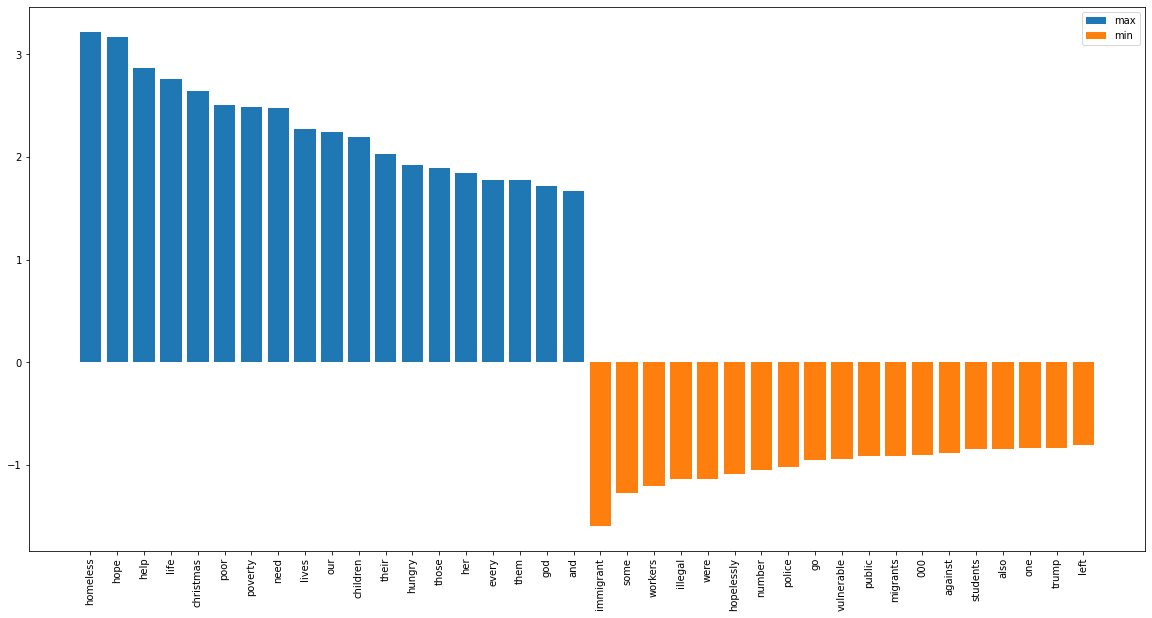

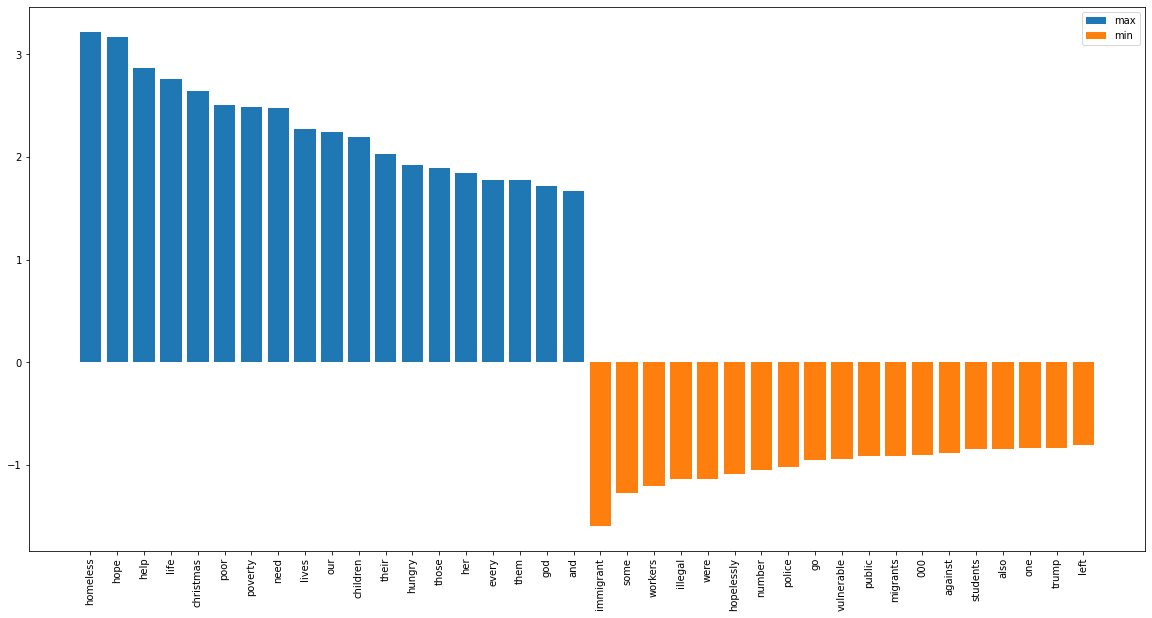

In [354]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
NB(X_train, y_train, X_test, y_test, X_val, y_val, tf)
LR(X_train, y_train, X_test, y_test, X_val, y_val, tf)



### Downsampling

['00' '000' '00pm' ... 'zoning' 'zuma' 'zurita']
accuracy:  0.8213944603629417
F1 score:  0.3551724137931035
class  0
class  1


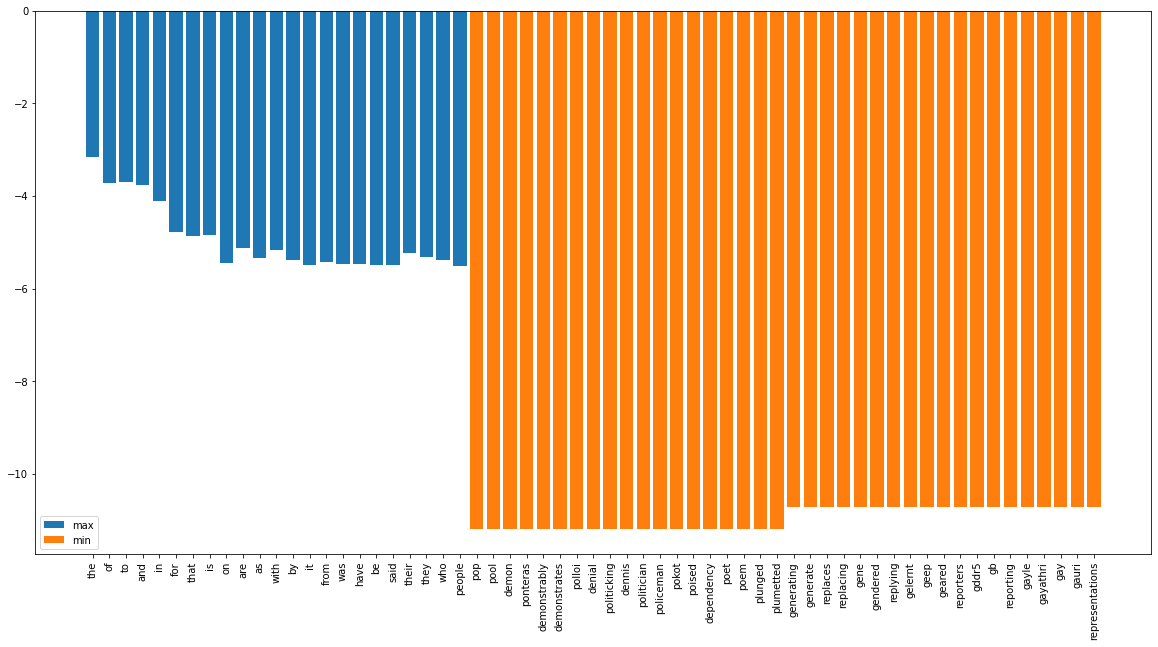

class:  1 pred:  0 text:  [array(['90', 'adding', 'and', 'another', 'apart', 'area', 'as', 'can',
       'concern', 'confined', 'constituency', 'degree', 'economic',
       'flyover', 'for', 'from', 'group', 'he', 'high', 'him', 'his',
       'homeless', 'improve', 'in', 'is', 'it', 'major', 'my', 'not',
       'of', 'on', 'one', 'people', 'public', 'rise', 'said', 'schools',
       'see', 'sleep', 'socio', 'standard', 'that', 'the', 'to',
       'underneath', 'view', 'water', 'while', 'you'], dtype='<U18')]
accuracy:  0.860381861575179
F1 score:  0.4845814977973568
class  0
class  1


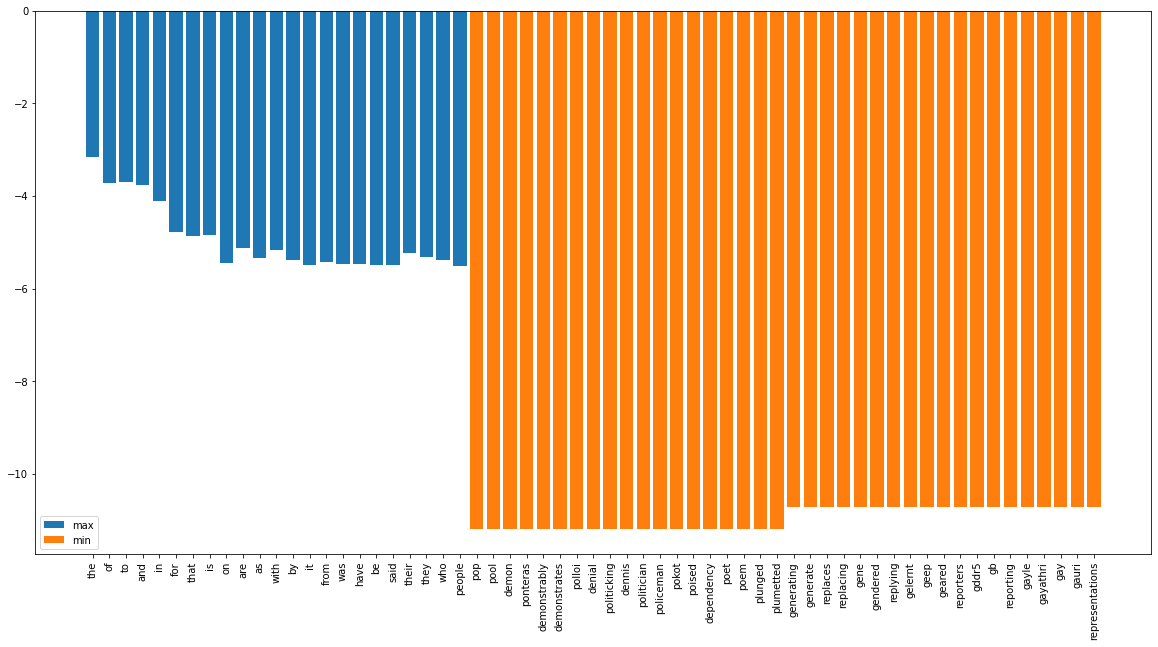

class:  0 pred:  1 text:  [array(['able', 'be', 'could', 'he', 'help', 'in', 'last', 'liked', 'lim',
       'ms', 'need', 'people', 'said', 'so', 'someone', 'the', 'this',
       'thought', 'time', 'to'], dtype='<U18')]


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.8190066857688634
F1 score:  0.3672787979966611
class  0

class:  1 pred:  0 text:  [array(['alone', 'anywhere', 'be', 'do', 'in', 'let', 'many', 'refugees',
       'resettled', 'the', 'to', 'us', 'want'], dtype='<U18')]
accuracy:  0.8424821002386634
F1 score:  0.42105263157894735
class  0

class:  0 pred:  1 text:  [array(['able', 'be', 'could', 'he', 'help', 'in', 'last', 'liked', 'lim',
       'ms', 'need', 'people', 'said', 'so', 'someone', 'the', 'this',
       'thought', 'time', 'to'], dtype='<U18')]
+=========================
['00' '000' '00pm' ... 'zoning' 'zuma' 'zurita']
accuracy:  0.8213944603629417
F1 score:  0.3551724137931035
class  0
class  1


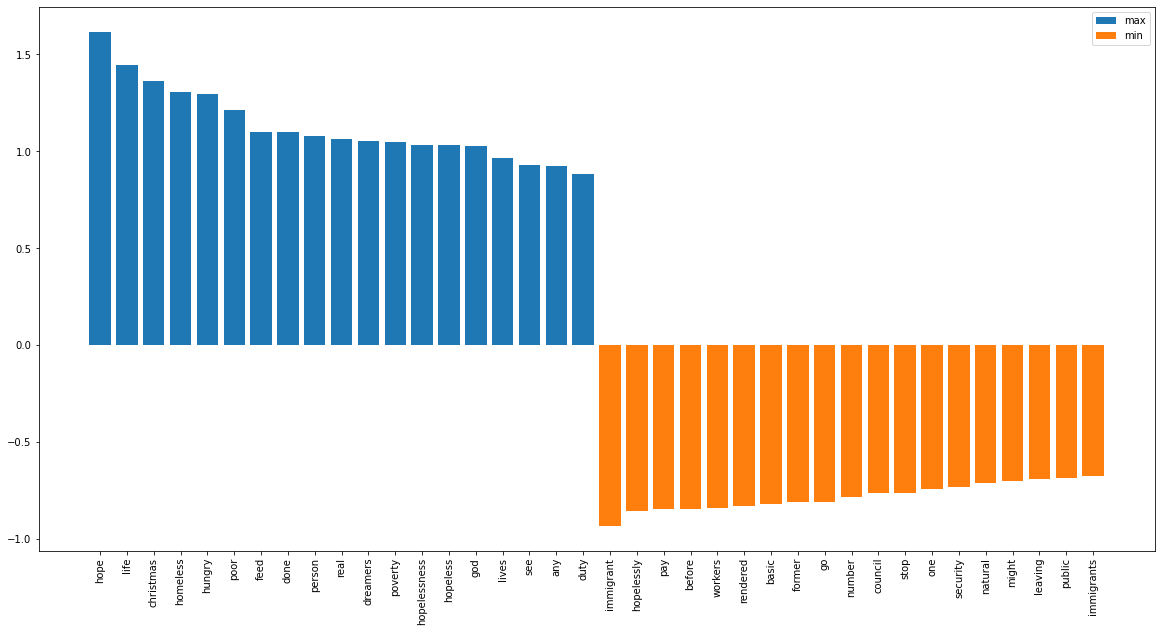

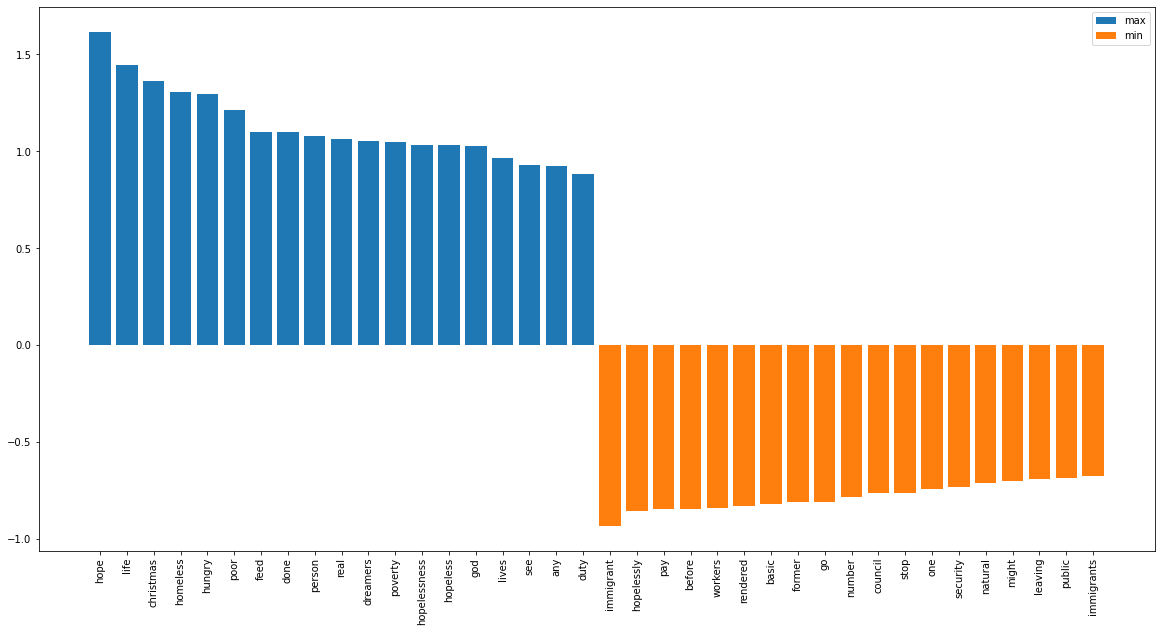

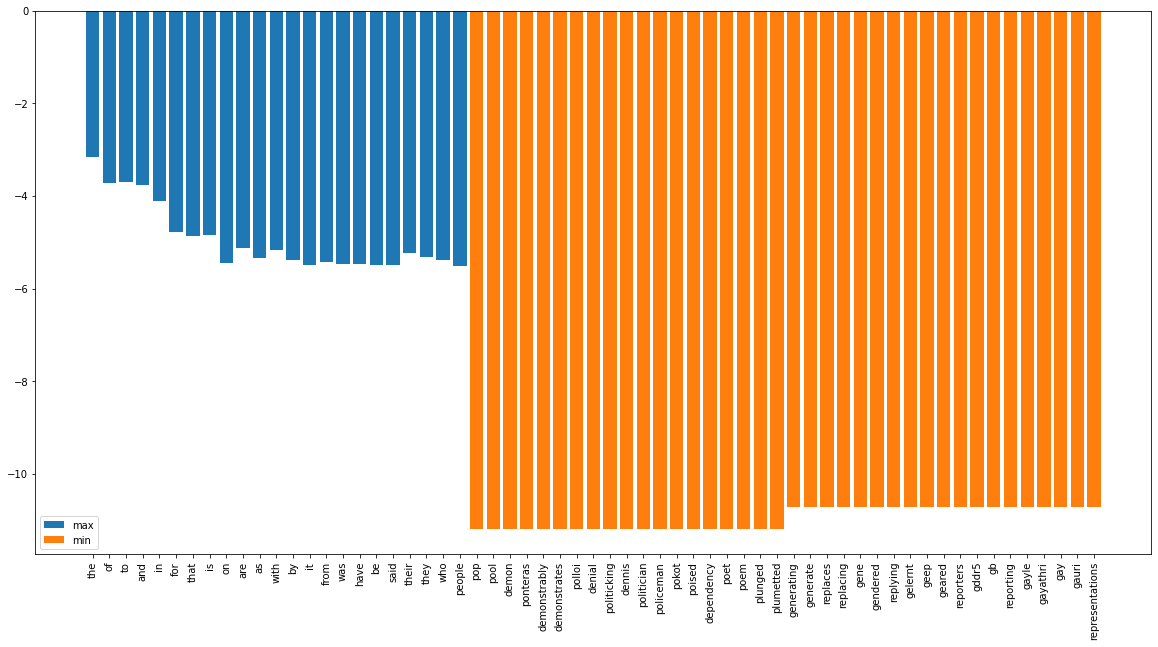

class:  1 pred:  0 text:  [array(['90', 'adding', 'and', 'another', 'apart', 'area', 'as', 'can',
       'concern', 'confined', 'constituency', 'degree', 'economic',
       'flyover', 'for', 'from', 'group', 'he', 'high', 'him', 'his',
       'homeless', 'improve', 'in', 'is', 'it', 'major', 'my', 'not',
       'of', 'on', 'one', 'people', 'public', 'rise', 'said', 'schools',
       'see', 'sleep', 'socio', 'standard', 'that', 'the', 'to',
       'underneath', 'view', 'water', 'while', 'you'], dtype='<U18')]
accuracy:  0.860381861575179
F1 score:  0.4845814977973568
class  0
class  1


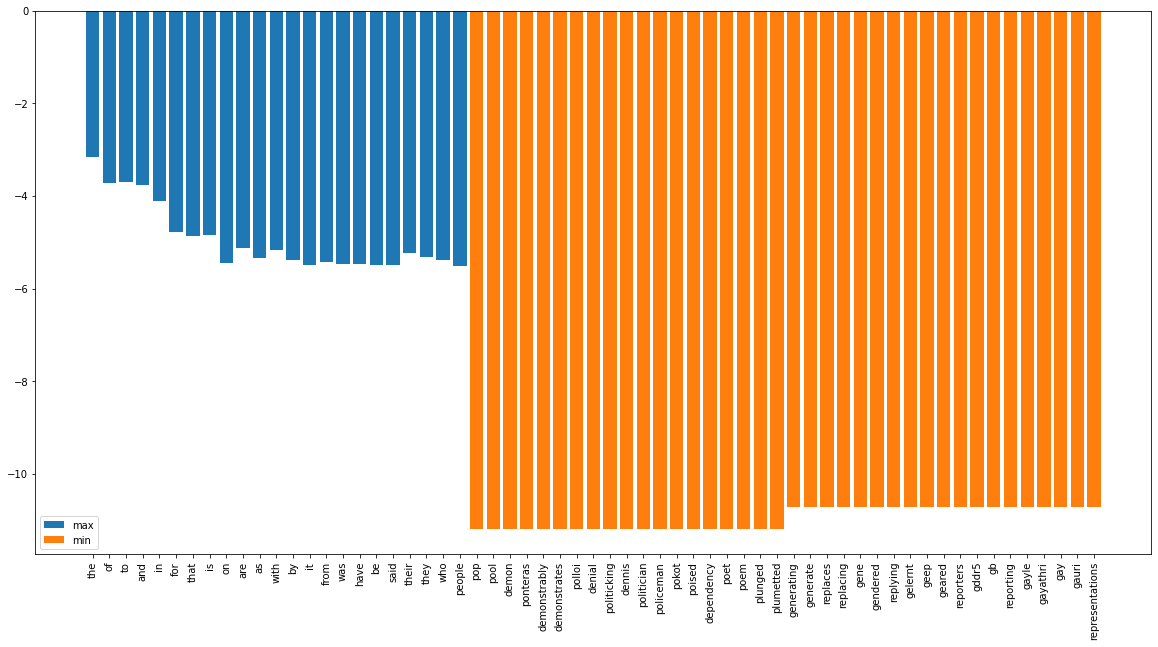

class:  0 pred:  1 text:  [array(['able', 'be', 'could', 'he', 'help', 'in', 'last', 'liked', 'lim',
       'ms', 'need', 'people', 'said', 'so', 'someone', 'the', 'this',
       'thought', 'time', 'to'], dtype='<U18')]


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.8190066857688634
F1 score:  0.3672787979966611
class  0

class:  1 pred:  0 text:  [array(['alone', 'anywhere', 'be', 'do', 'in', 'let', 'many', 'refugees',
       'resettled', 'the', 'to', 'us', 'want'], dtype='<U18')]
accuracy:  0.8424821002386634
F1 score:  0.42105263157894735
class  0

class:  0 pred:  1 text:  [array(['able', 'be', 'could', 'he', 'help', 'in', 'last', 'liked', 'lim',
       'ms', 'need', 'people', 'said', 'so', 'someone', 'the', 'this',
       'thought', 'time', 'to'], dtype='<U18')]
+=========================
['00' '000' '00pm' ... 'zoning' 'zuma' 'zurita']
accuracy:  0.9073543457497613
F1 score:  0.058252427184466014
class  0
class  1


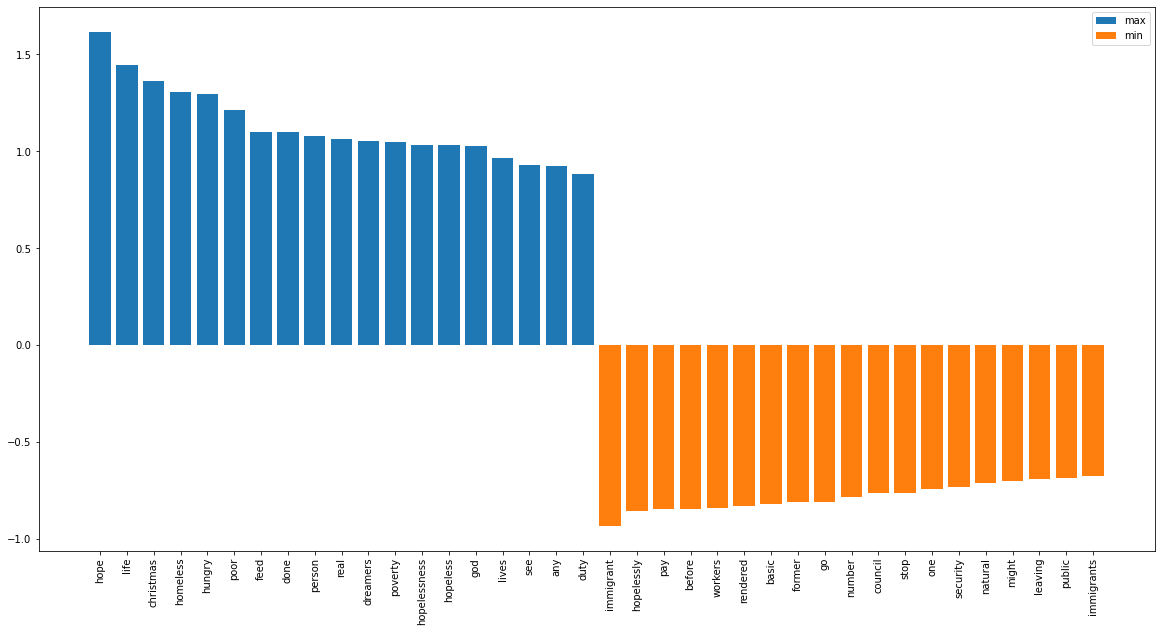

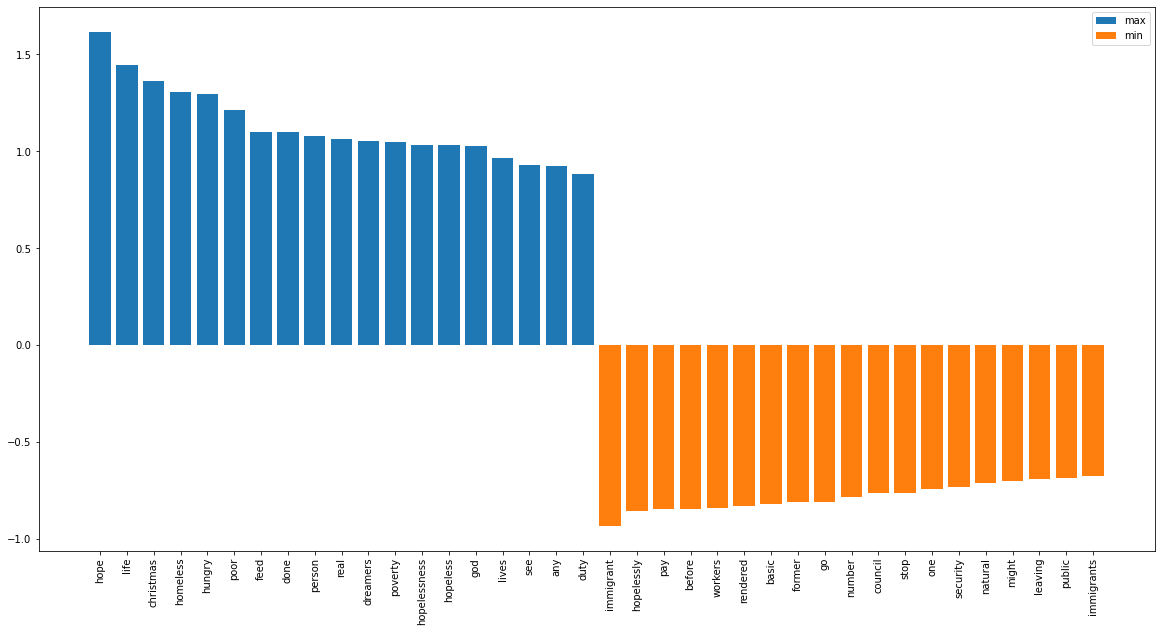

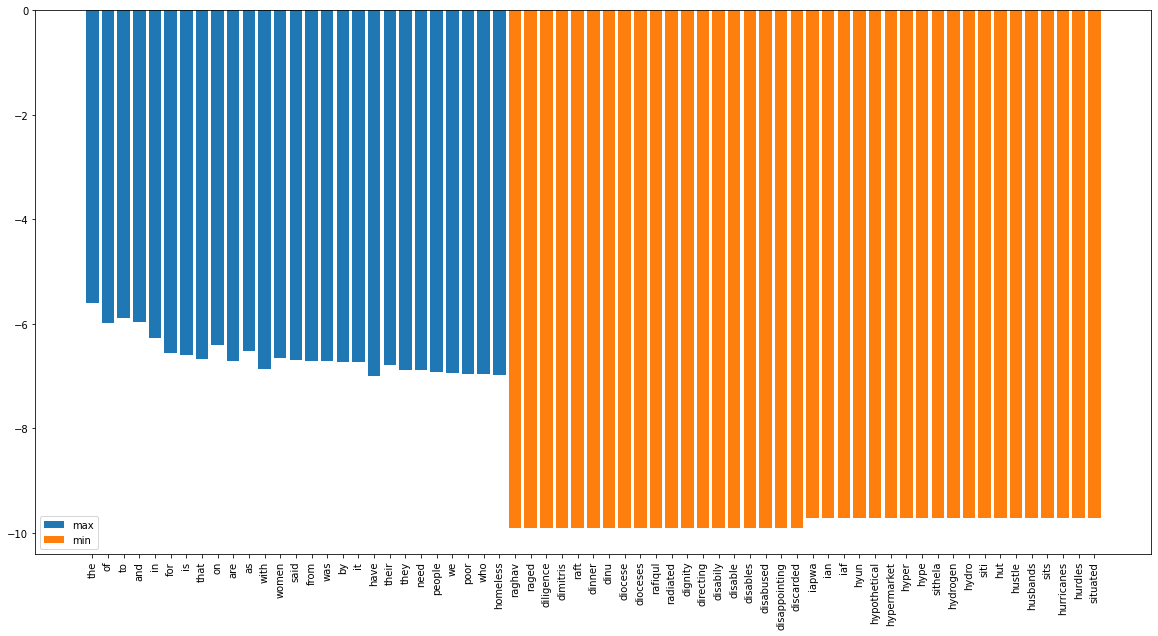

class:  1 pred:  0 text:  [array(['with', 'who', 'we', 'understand', 'they', 'them', 'their', 'the',
       'that', 'support', 'someone', 'situation', 'resources',
       'receiving', 'put', 'provide', 'plan', 'perspective', 'parenting',
       'others', 'or', 'of', 'not', 'normal', 'needs', 'know', 'is', 'in',
       'hopeless', 'help', 'from', 'for', 'feelings', 'either',
       'developing', 'counseling', 'could', 'communicate', 'child', 'can',
       'by', 'benefit', 'are', 'and', 'an', 'also', 'adoption', 'access',
       'about'], dtype='<U18')]
accuracy:  0.8949880668257757
F1 score:  0.0
class  0
class  1


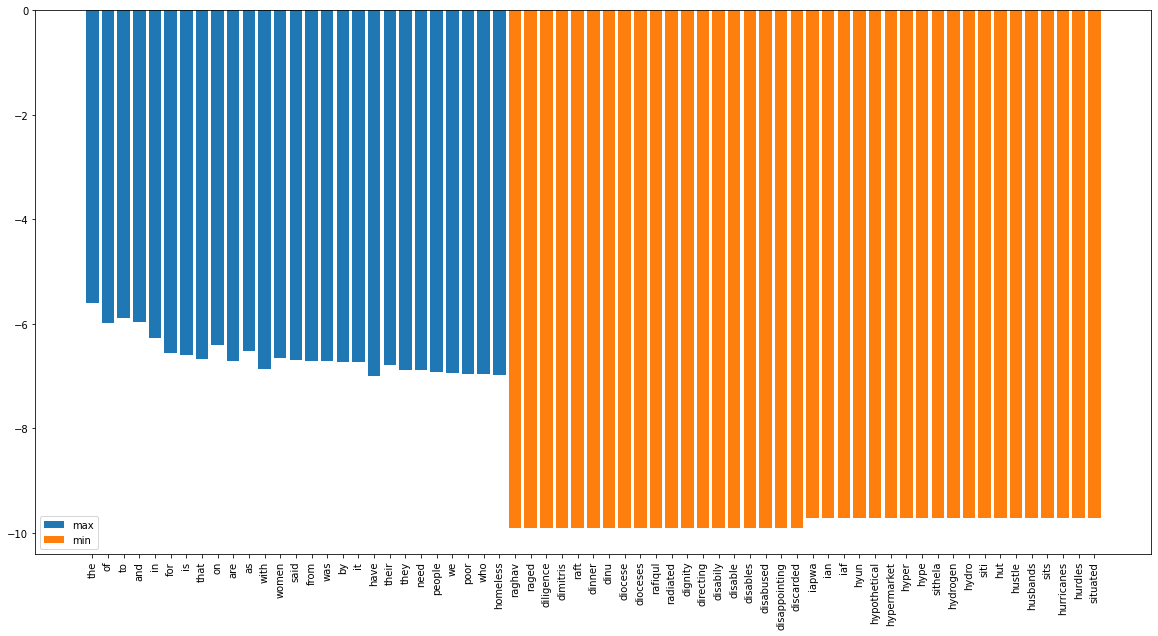

class:  1 pred:  0 text:  [array(['young', 'you', 'was', 'vulnerable', 'up', 'to', 'thrown', 'this',
       'that', 'tell', 'she', 'seeks', 'question', 'protect',
       'passionate', 'lit', 'listening', 'just', 'is', 'initiative',
       'how', 'her', 'from', 'face', 'each', 'could', 'children', 'betty',
       'at', 'as', 'and', 'about'], dtype='<U18')]
accuracy:  0.8820439350525311
F1 score:  0.3650385604113111
class  0

class:  1 pred:  0 text:  [array(['thursday', 'the', 'rome', 'refugees', 'refugee', 'pope',
       'outskirts', 'orthodox', 'on', 'of', 'muslim', 'moving', 'mass',
       'march', 'in', 'holy', 'hindu', 'francis', 'feet', 'during',
       'ceremony', 'centre', 'catholic', 'at', 'and', '24'], dtype='<U18')]
accuracy:  0.8949880668257757
F1 score:  0.46341463414634143
class  0

class:  0 pred:  1 text:  [array(['to', 'time', 'thought', 'this', 'the', 'someone', 'so', 'said',
       'people', 'need', 'ms', 'lim', 'liked', 'last', 'in', 'help', 'he',
       'could', 'be

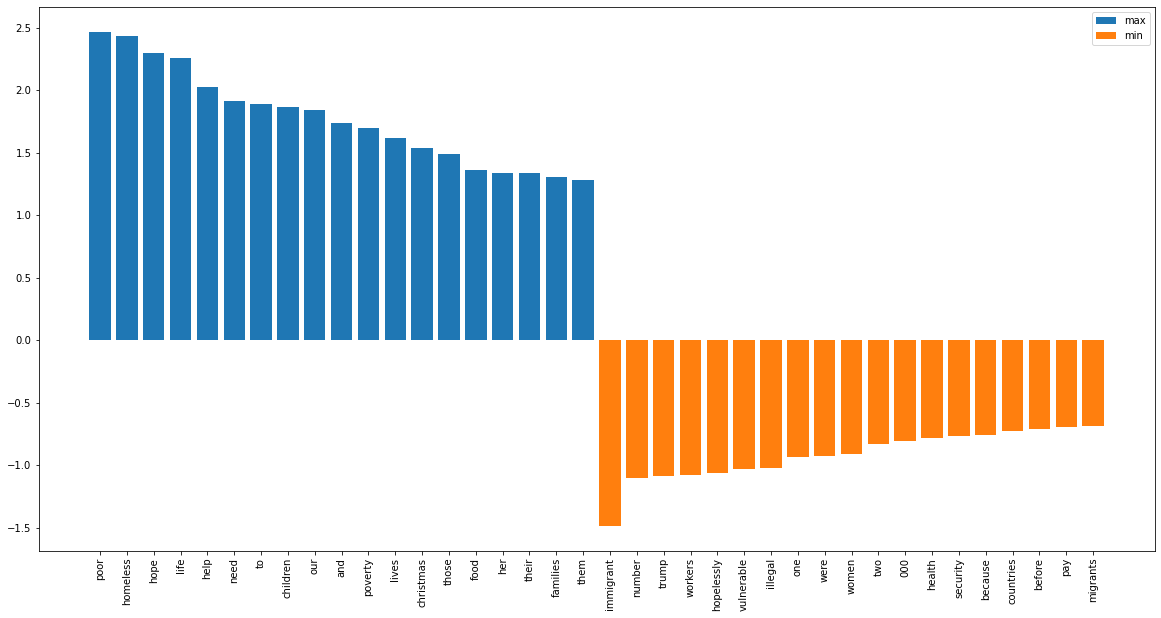

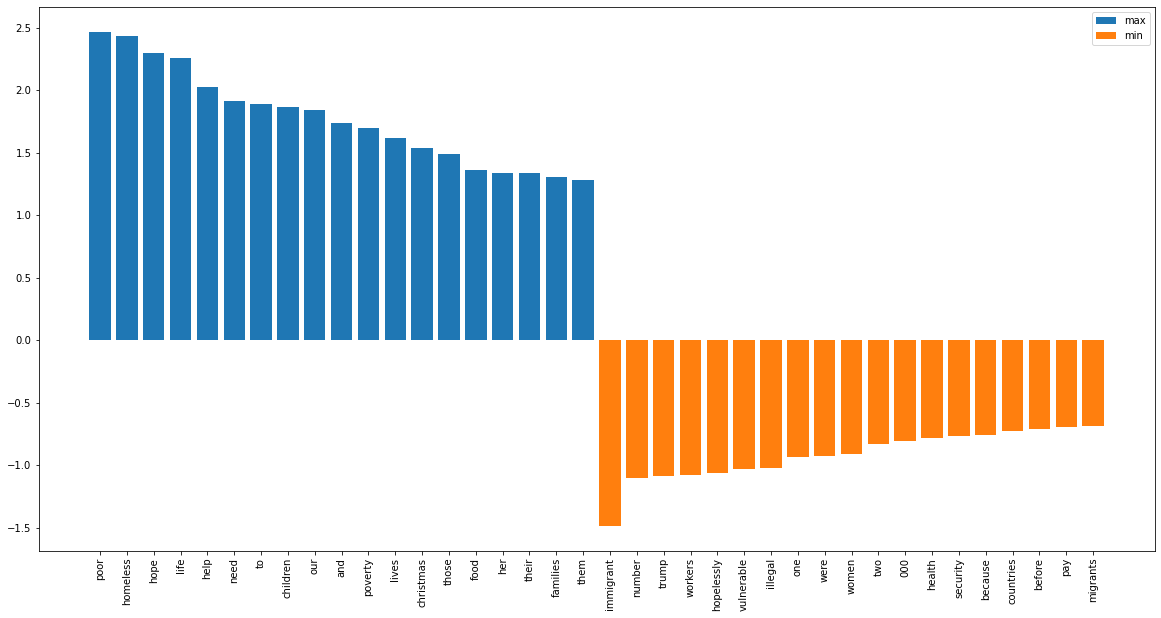

In [355]:
# extract the data with 0 label, the same snumber of 1 label
# and combine them together
# 0 label
data_0 = train_data[train_data['label'] == 0]
# 1 label
data_1 = train_data[train_data['label'] == 1]
# combine them together
n = int(len(data_1)*2)
data_0 = data_0.sample(n , random_state=42)
data = pd.concat([data_0, data_1], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
# data.head()
# print(data[data['label'] == 1].count())
X_train, y_train = data['text'], data['label']
NB(X_train, y_train, X_test, y_test, X_val, y_val, cv)
LR(X_train, y_train, X_test, y_test, X_val, y_val, cv)
print("+=========================")
NB(X_train, y_train, X_test, y_test, X_val, y_val, vectorizer)
LR(X_train, y_train, X_test, y_test, X_val, y_val, vectorizer)
print("+=========================")
NB(X_train, y_train, X_test, y_test, X_val, y_val, tf)
LR(X_train, y_train, X_test, y_test, X_val, y_val, tf)



### Upsampling

['00' '000' '000m' ... 'zuri' 'zurita' 'zyngier']
accuracy:  0.8304680038204394
F1 score:  0.3603603603603604
class  0
class  1


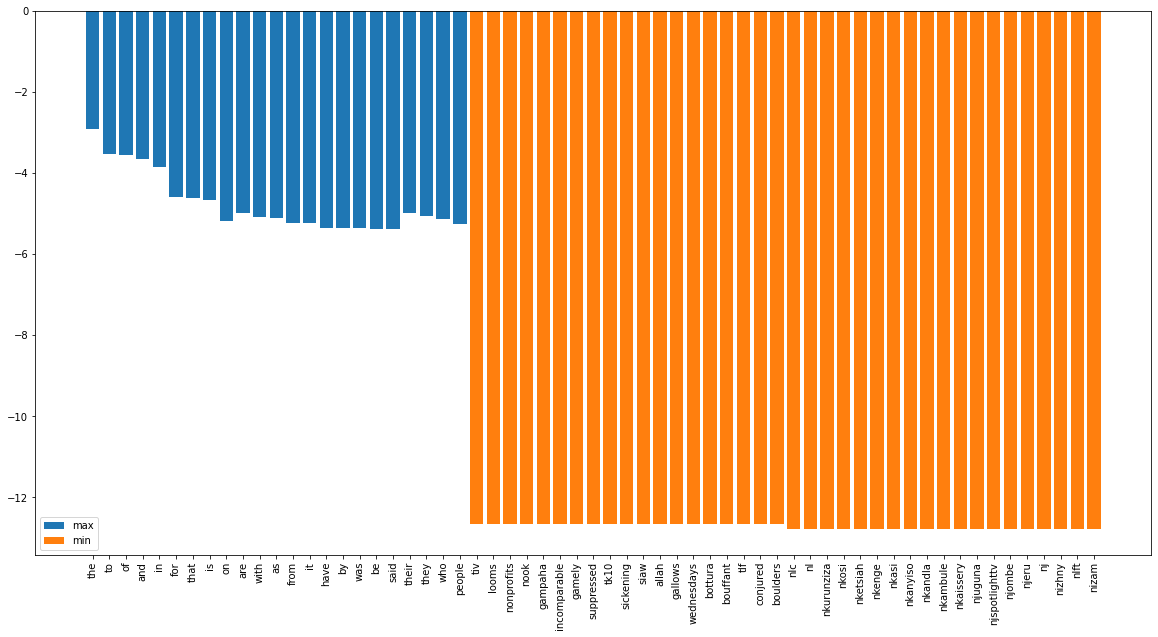

class:  1 pred:  0 text:  [array(['and', 'angela', 'are', 'budding', 'build', 'chefs', 'desperately',
       'either', 'enable', 'fred', 'hand', 'helping', 'homeless',
       'housed', 'in', 'kitchen', 'like', 'lives', 'need', 'of', 'or',
       're', 'recently', 'shattered', 'the', 'their', 'them', 'to',
       'winston'], dtype='<U21')]
accuracy:  0.8532219570405728
F1 score:  0.45333333333333337
class  0
class  1


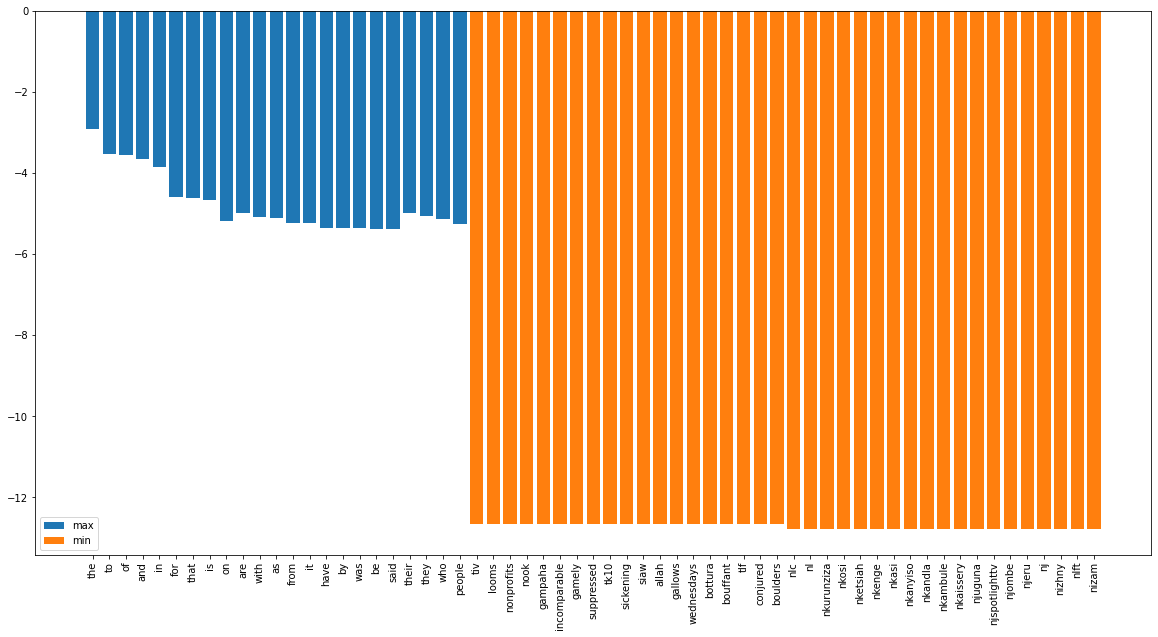

class:  0 pred:  1 text:  [array(['able', 'be', 'could', 'he', 'help', 'in', 'last', 'liked', 'lim',
       'ms', 'need', 'people', 'said', 'so', 'someone', 'the', 'this',
       'thought', 'time', 'to'], dtype='<U21')]


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.8753581661891118
F1 score:  0.3523573200992556
class  0

class:  1 pred:  0 text:  [array(['alone', 'anywhere', 'be', 'do', 'in', 'let', 'many', 'refugees',
       'resettled', 'the', 'to', 'us', 'want'], dtype='<U21')]


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.8937947494033412
F1 score:  0.4539877300613497
class  0

class:  0 pred:  1 text:  [array(['able', 'be', 'could', 'he', 'help', 'in', 'last', 'liked', 'lim',
       'ms', 'need', 'people', 'said', 'so', 'someone', 'the', 'this',
       'thought', 'time', 'to'], dtype='<U21')]
+=========================
['00' '000' '000m' ... 'zuri' 'zurita' 'zyngier']
accuracy:  0.8304680038204394
F1 score:  0.3603603603603604
class  0
class  1


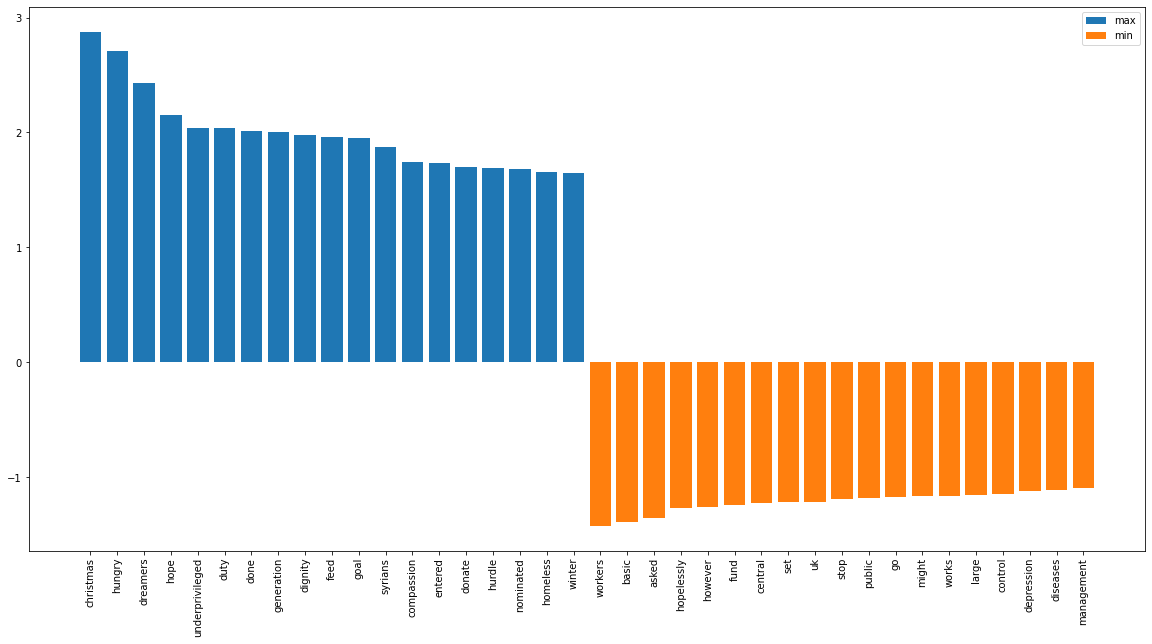

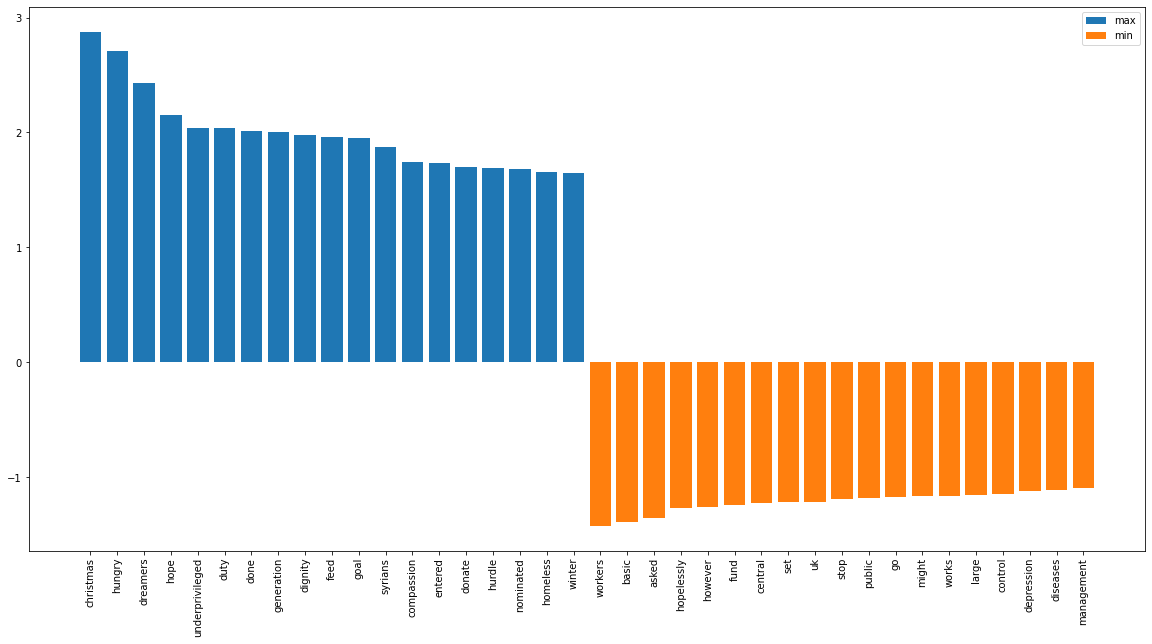

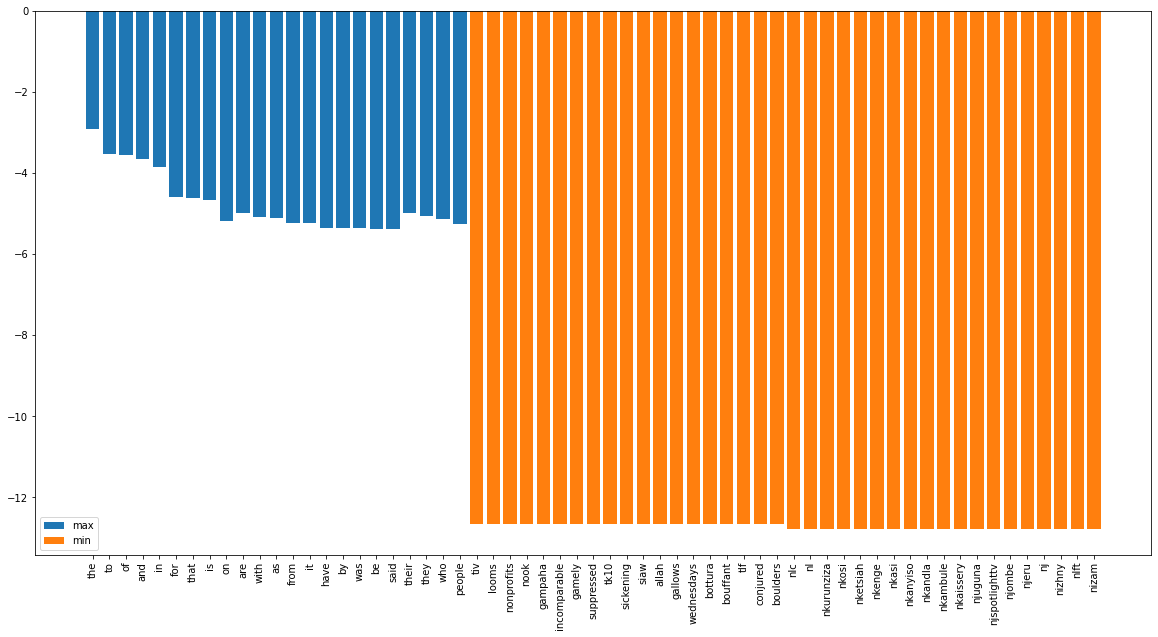

class:  1 pred:  0 text:  [array(['and', 'angela', 'are', 'budding', 'build', 'chefs', 'desperately',
       'either', 'enable', 'fred', 'hand', 'helping', 'homeless',
       'housed', 'in', 'kitchen', 'like', 'lives', 'need', 'of', 'or',
       're', 'recently', 'shattered', 'the', 'their', 'them', 'to',
       'winston'], dtype='<U21')]
accuracy:  0.8532219570405728
F1 score:  0.45333333333333337
class  0
class  1


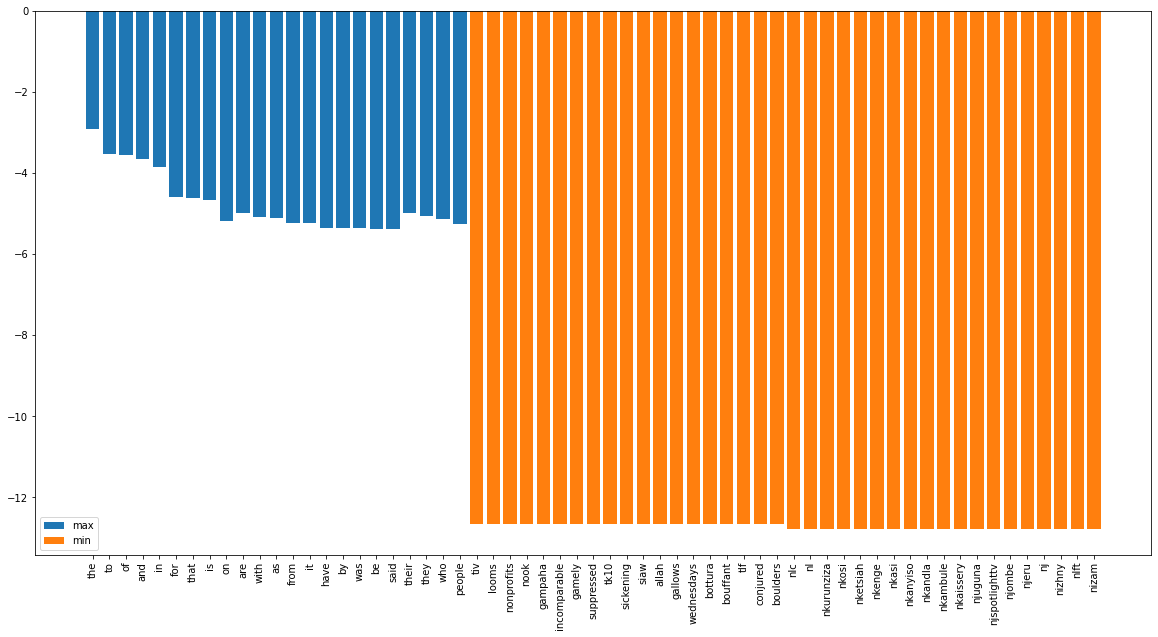

class:  0 pred:  1 text:  [array(['able', 'be', 'could', 'he', 'help', 'in', 'last', 'liked', 'lim',
       'ms', 'need', 'people', 'said', 'so', 'someone', 'the', 'this',
       'thought', 'time', 'to'], dtype='<U21')]


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.8753581661891118
F1 score:  0.3523573200992556
class  0

class:  1 pred:  0 text:  [array(['alone', 'anywhere', 'be', 'do', 'in', 'let', 'many', 'refugees',
       'resettled', 'the', 'to', 'us', 'want'], dtype='<U21')]


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.8937947494033412
F1 score:  0.4539877300613497
class  0

class:  0 pred:  1 text:  [array(['able', 'be', 'could', 'he', 'help', 'in', 'last', 'liked', 'lim',
       'ms', 'need', 'people', 'said', 'so', 'someone', 'the', 'this',
       'thought', 'time', 'to'], dtype='<U21')]
+=========================
['00' '000' '000m' ... 'zuri' 'zurita' 'zyngier']
accuracy:  0.7540592168099332
F1 score:  0.3538268506900878
class  0
class  1


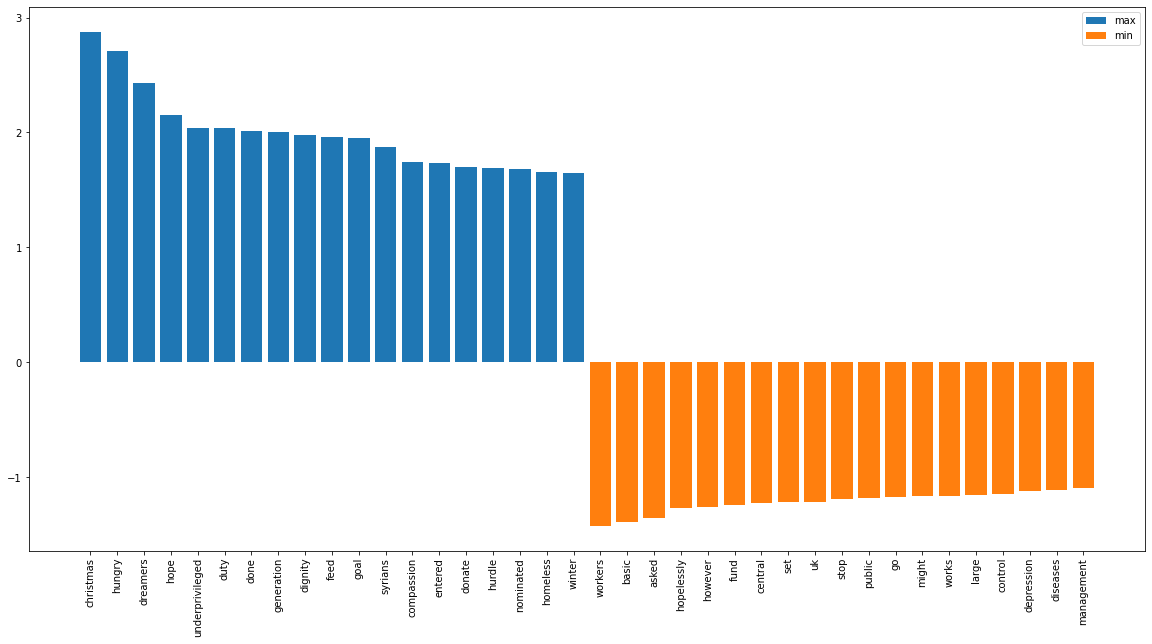

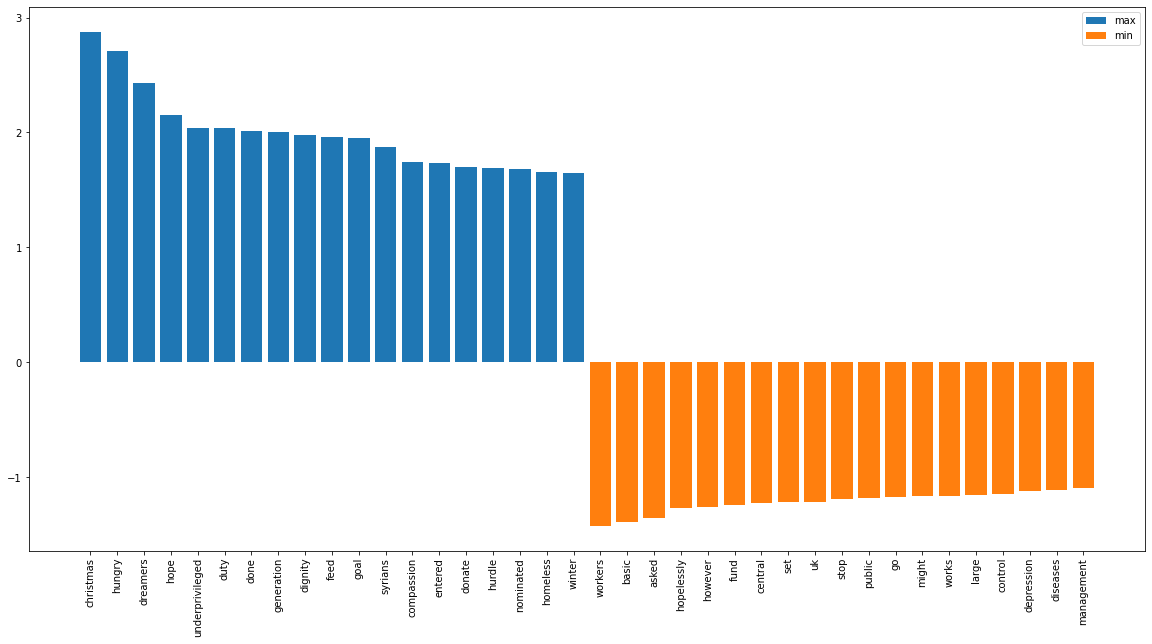

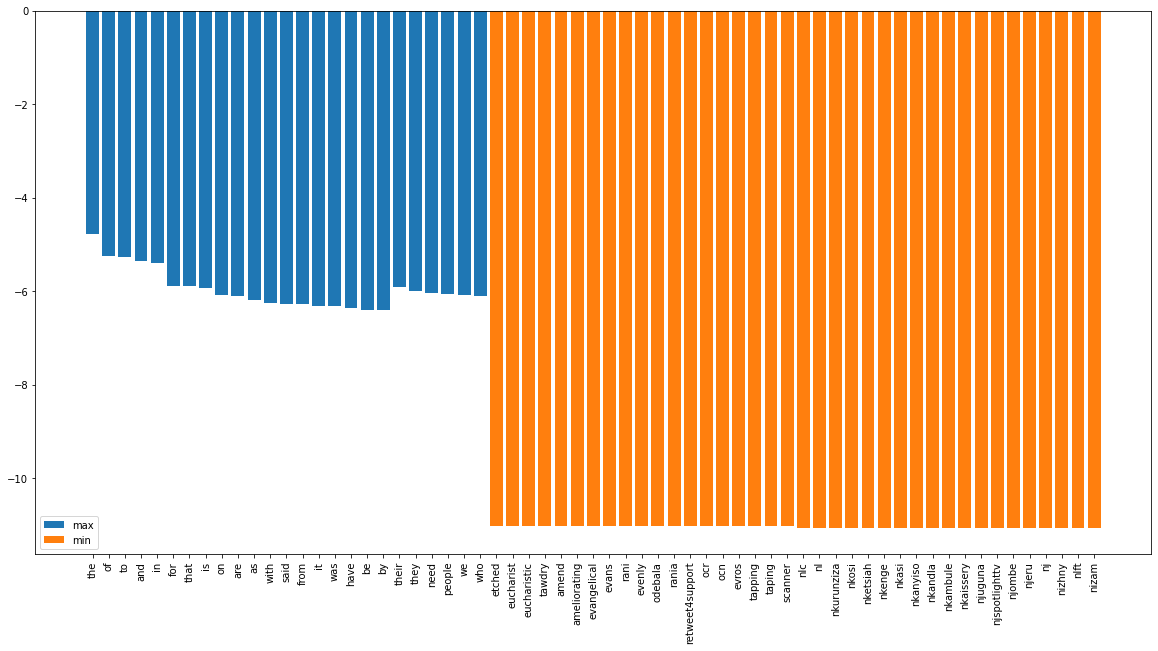

class:  1 pred:  0 text:  [array(['you', 'while', 'water', 'view', 'underneath', 'to', 'the', 'that',
       'standard', 'socio', 'sleep', 'see', 'schools', 'said', 'rise',
       'public', 'people', 'pavements', 'one', 'on', 'of', 'not', 'my',
       'major', 'it', 'is', 'in', 'improve', 'homeless', 'his', 'him',
       'high', 'he', 'group', 'from', 'for', 'flyover', 'economic',
       'degree', 'constituency', 'confined', 'concern', 'can', 'as',
       'area', 'apart', 'another', 'and', 'adding', '90'], dtype='<U21')]
accuracy:  0.7756563245823389
F1 score:  0.3935483870967742
class  0
class  1


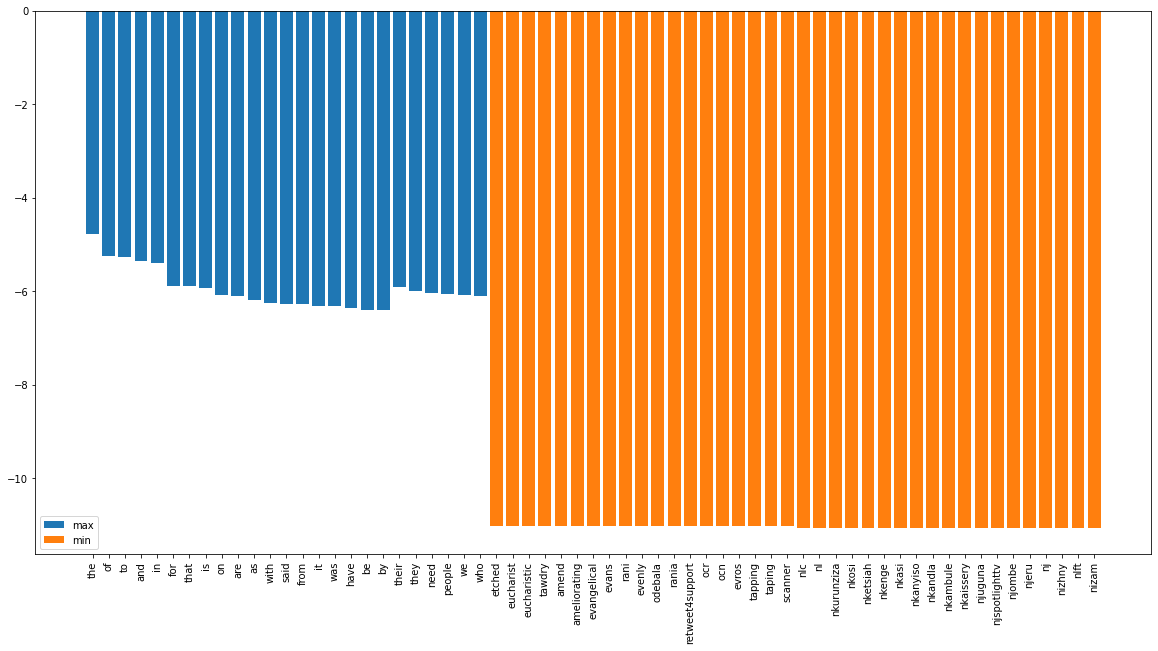

class:  0 pred:  1 text:  [array(['to', 'time', 'thought', 'this', 'the', 'someone', 'so', 'said',
       'people', 'need', 'ms', 'lim', 'liked', 'last', 'in', 'help', 'he',
       'could', 'be', 'able'], dtype='<U21')]
accuracy:  0.8615090735434575
F1 score:  0.42000000000000004
class  0

class:  1 pred:  0 text:  [array(['want', 'us', 'to', 'the', 'resettled', 'refugees', 'many', 'let',
       'in', 'do', 'be', 'anywhere', 'alone'], dtype='<U21')]
accuracy:  0.8735083532219571
F1 score:  0.4854368932038835
class  0

class:  0 pred:  1 text:  [array(['to', 'time', 'thought', 'this', 'the', 'someone', 'so', 'said',
       'people', 'need', 'ms', 'lim', 'liked', 'last', 'in', 'help', 'he',
       'could', 'be', 'able'], dtype='<U21')]


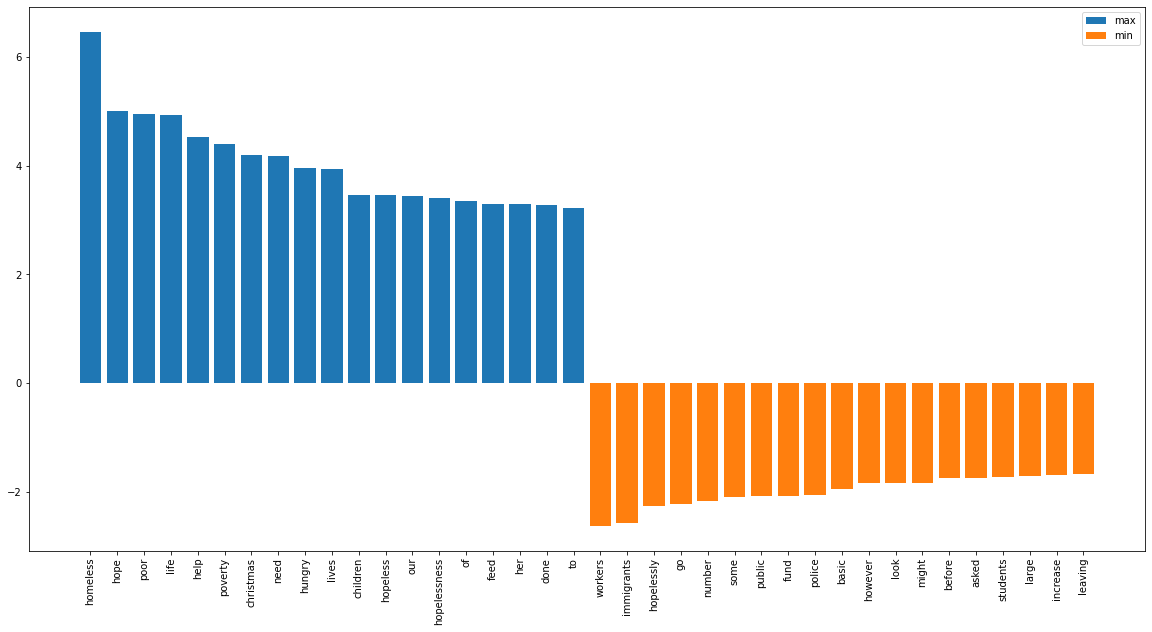

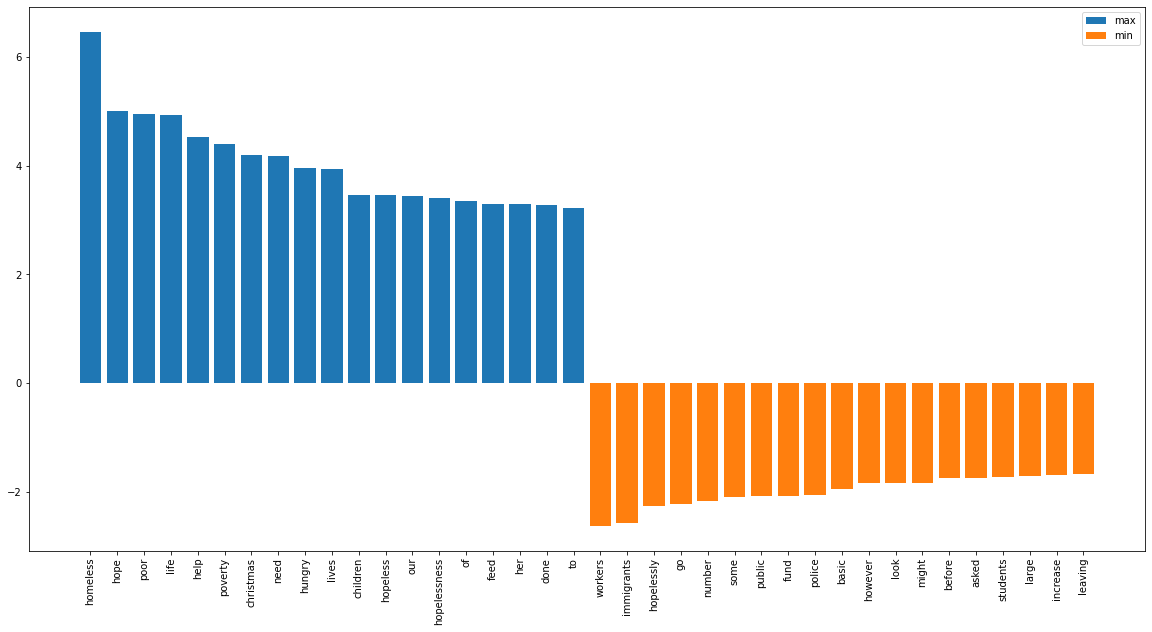

In [356]:
data_0 = train_data[train_data['label'] == 0]
# 1 label
data_1 = train_data[train_data['label'] == 1]

data = pd.concat([data_0, data_1], axis=0)
for i in range(9):
    data = pd.concat([data, data_1], axis=0)
X_train, y_train = data['text'], data['label']
NB(X_train, y_train, X_test, y_test, X_val, y_val, cv)
LR(X_train, y_train, X_test, y_test, X_val, y_val, cv)
print("+=========================")
NB(X_train, y_train, X_test, y_test, X_val, y_val, vectorizer)
LR(X_train, y_train, X_test, y_test, X_val, y_val, vectorizer)
print("+=========================")
NB(X_train, y_train, X_test, y_test, X_val, y_val, tf)
LR(X_train, y_train, X_test, y_test, X_val, y_val, tf)


It obviouse that the naive way cannot handle the classification on this task, for the bag of words. The logistic classification has better performance than the naive bayesian. Also, if we use the pre-trianed word embeddings, like GLOVE, the simple classification also have poor performance since the high dimensional vector is too sparse and hard to fit for the logistic and naive bayes. Also, the highly unbalanced label lead to the low F1 score.

d:\yanbo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of ham and spam messages')

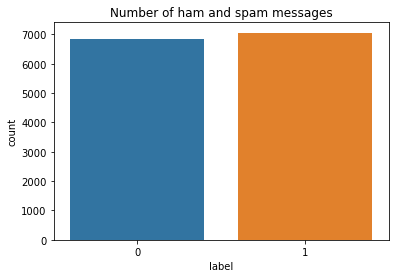

In [357]:
# visualize the data
sns.countplot(data['label'])
plt.xlabel('label')
plt.title('Number of ham and spam messages')
 

In [358]:
# chi square test of bow
from sklearn.feature_selection import chi2, SelectKBest
bow = cv.fit_transform(X_train)
selector = SelectKBest(chi2, k=1000)
X_new = selector.fit_transform(bow, y_train)
print(X_new.shape)
print(bow.shape)

(13891, 1000)
(13891, 25537)


(13891, 1000)
(13891, 25537)


d:\yanbo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


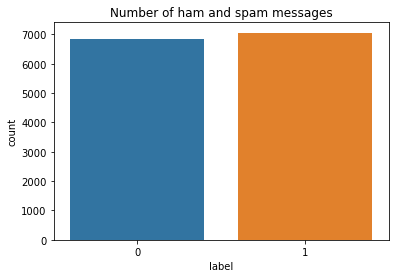

In [359]:
# visualize the 
X_train_counts = selector.get_feature_names_out()
# print(X_train_counts)

# visualize the data
sns.countplot(data['label'])
plt.xlabel('label')
plt.title('Number of ham and spam messages')

# chi square test of bow
from sklearn.feature_selection import chi2, SelectKBest
selector = SelectKBest(chi2, k=1000)
X_new = selector.fit_transform(bow, y_train)
print(X_new.shape)
print(bow.shape)

# visualize the
X_train_counts = selector.get_feature_names_out()
# print(X_train_counts)

### Bagging

In [360]:
data_dir = './datasets/'
original_train_data = pd.read_csv(data_dir + 'train_data.csv')
augmented_train_data = pd.read_csv(data_dir + 'augmented_data_label_1_pegasus.csv')
# augmented_train_data = pd.read_csv(data_dir + 'augmented_data_label_1_parrot.csv')
train_data = pd.concat([original_train_data, augmented_train_data], axis=0)

val_data = pd.read_csv(data_dir + 'val_data.csv')
X_val, y_val = val_data['text'], val_data['label']
# create 5 balanced sub-datasets for bagging
num_sub_datasets = 5
train_data_list = []

ones = train_data[train_data['label'] == 1]
zeros = train_data[train_data['label'] == 0]
num = len(ones)

for i in range(num_sub_datasets):
    train_data_list.append(pd.concat([ones, zeros.sample(n=num, random_state=i)], axis=0))

+++++++++++++++++++++++++++++
['00' '000' '000m' ... 'zulu' 'zuma' 'zyngier']
accuracy:  0.8390639923591213
F1 score:  0.34816247582205034
class  0
class  1


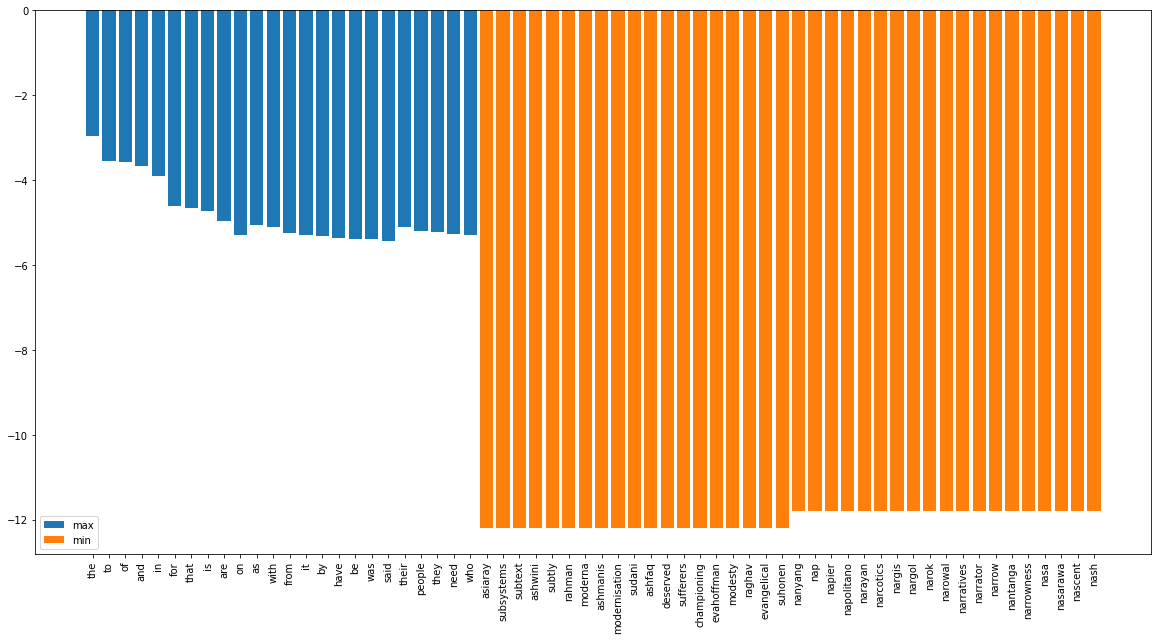

class:  1 pred:  0 text:  [array(['alone', 'anywhere', 'be', 'do', 'in', 'let', 'many', 'refugees',
       'resettled', 'the', 'to', 'us', 'want'], dtype='<U21')]
accuracy:  0.8460620525059666
F1 score:  0.41628959276018096
class  0
class  1


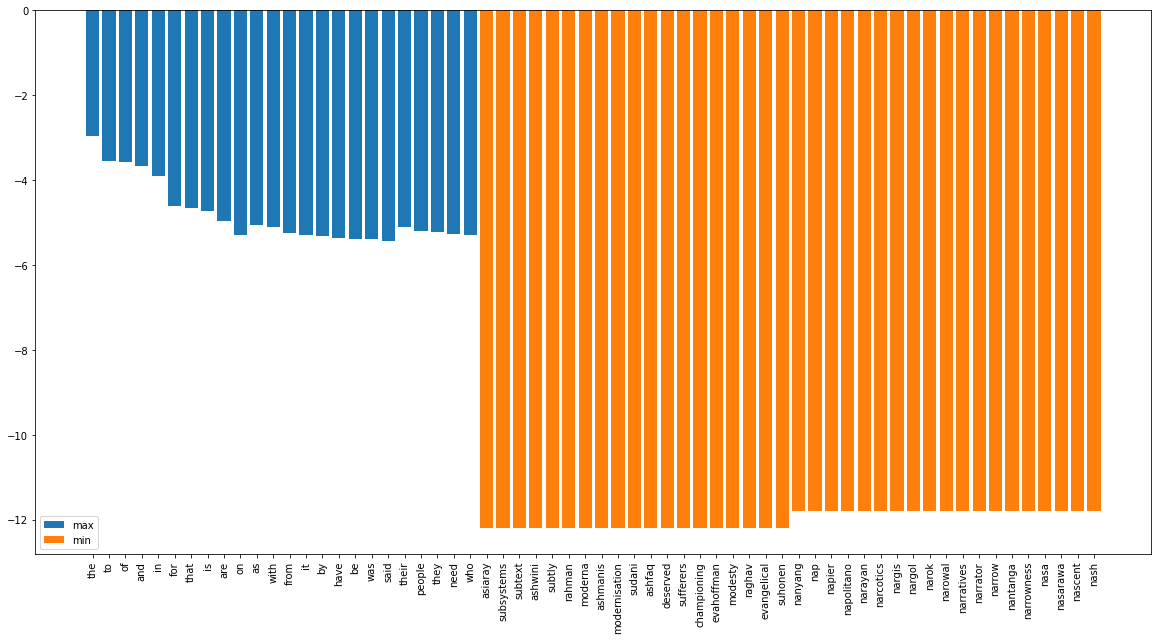

class:  0 pred:  1 text:  [array(['able', 'be', 'could', 'he', 'help', 'in', 'last', 'liked', 'lim',
       'ms', 'need', 'people', 'said', 'so', 'someone', 'the', 'this',
       'thought', 'time', 'to'], dtype='<U21')]
+++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++
['00' '000' '000m' ... 'zuri' 'zurita' 'zyngier']
accuracy:  0.8390639923591213
F1 score:  0.33267326732673275
class  0
class  1


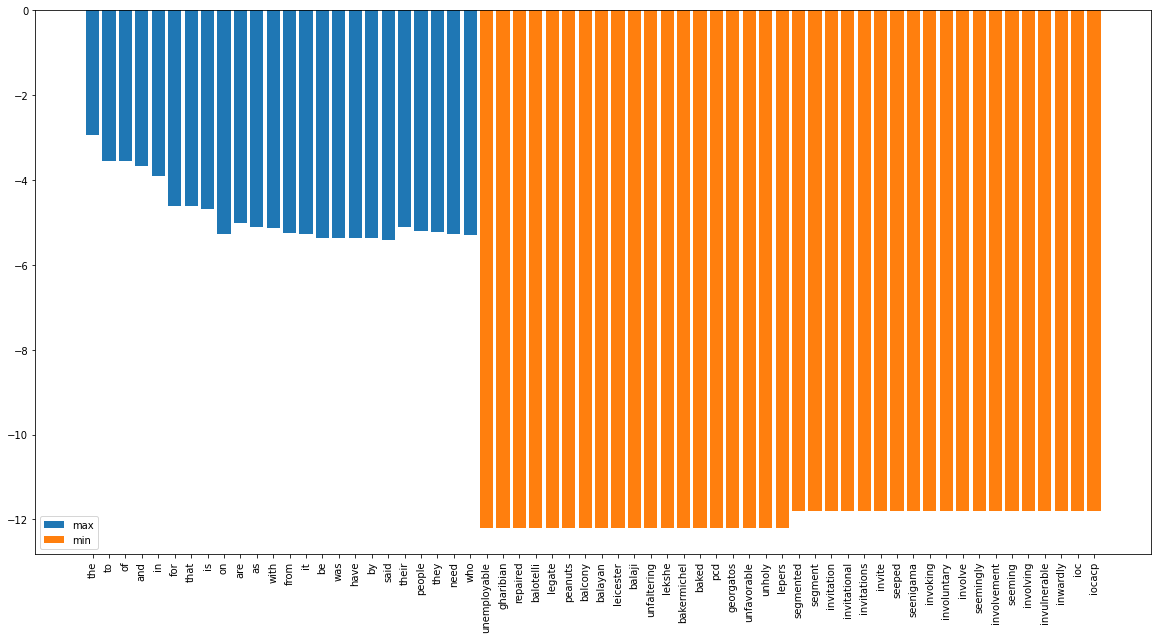

class:  1 pred:  0 text:  [array(['alone', 'anywhere', 'be', 'do', 'in', 'let', 'many', 'refugees',
       'resettled', 'the', 'to', 'us', 'want'], dtype='<U21')]
accuracy:  0.850835322195704
F1 score:  0.4292237442922374
class  0
class  1


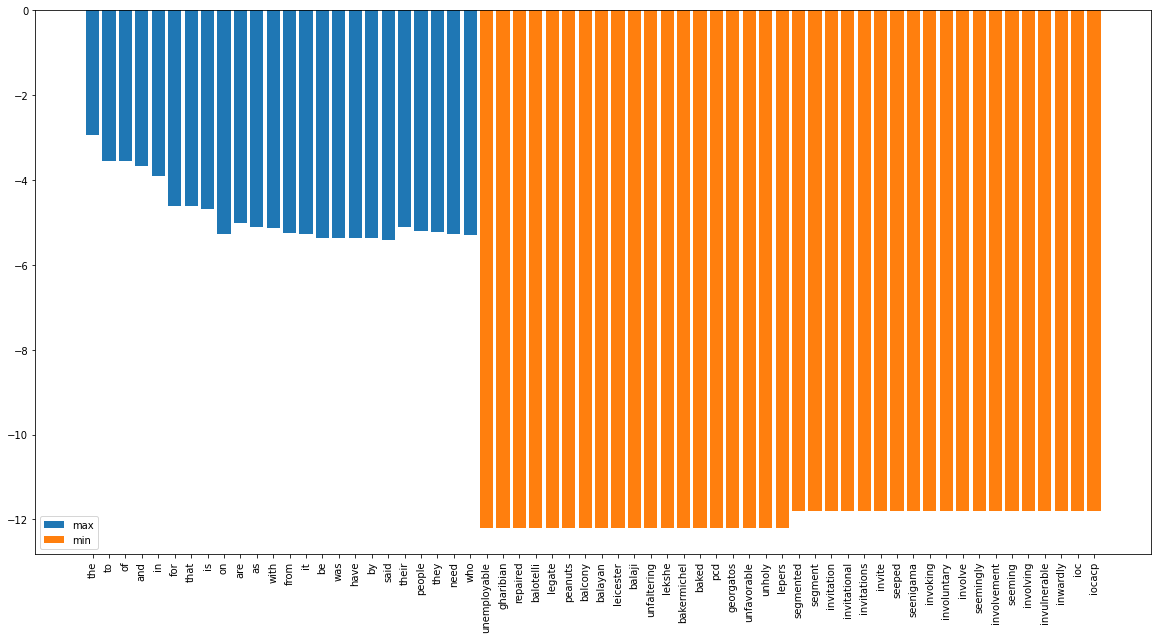

class:  0 pred:  1 text:  [array(['able', 'be', 'could', 'he', 'help', 'in', 'last', 'liked', 'lim',
       'ms', 'need', 'people', 'said', 'so', 'someone', 'the', 'this',
       'thought', 'time', 'to'], dtype='<U21')]
+++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++
['00' '000' '000m' ... 'zuri' 'zurita' 'zyngier']
accuracy:  0.8347659980897804
F1 score:  0.3268482490272373
class  0
class  1


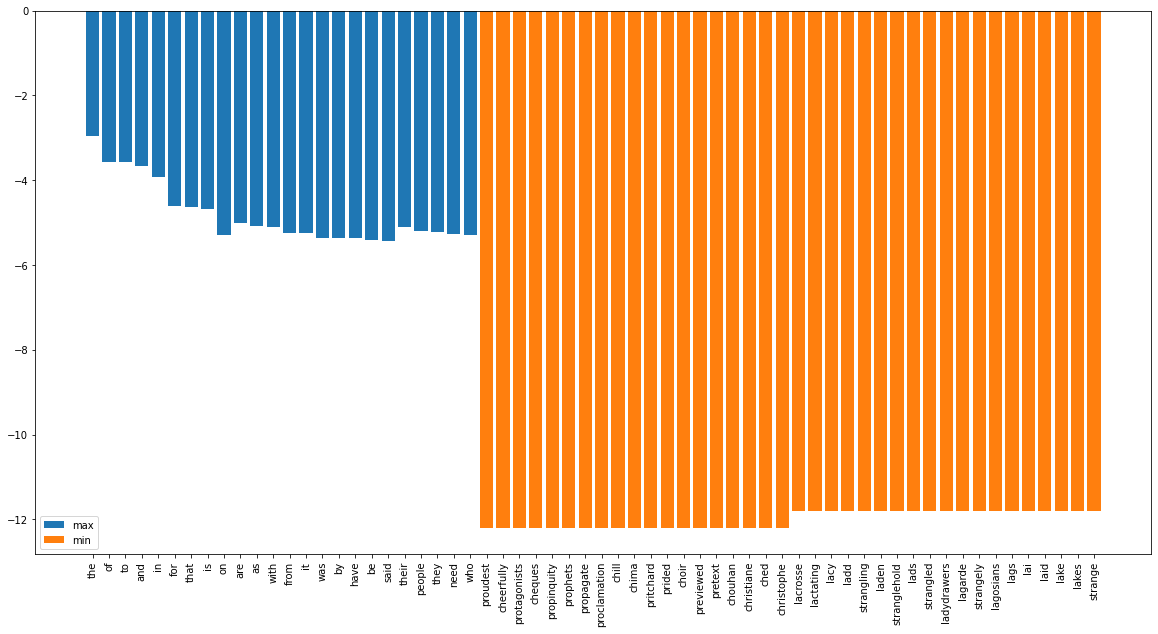

class:  1 pred:  0 text:  [array(['alone', 'anywhere', 'be', 'do', 'in', 'let', 'many', 'refugees',
       'resettled', 'the', 'to', 'us', 'want'], dtype='<U21')]
accuracy:  0.8424821002386634
F1 score:  0.43103448275862066
class  0
class  1


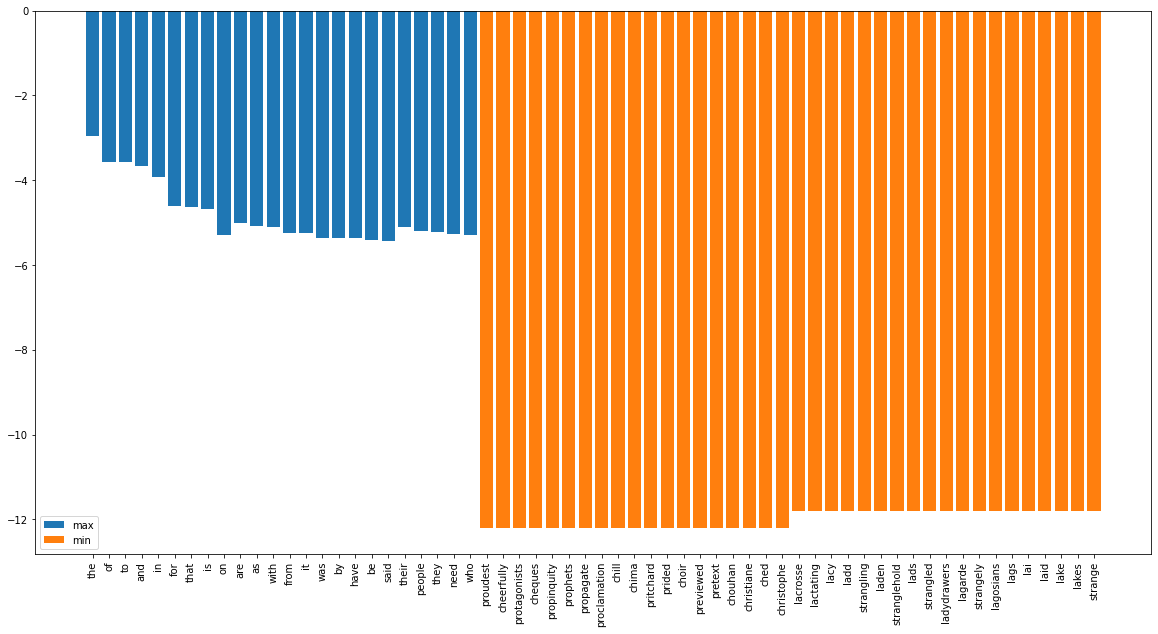

class:  0 pred:  1 text:  [array(['able', 'be', 'could', 'he', 'help', 'in', 'last', 'liked', 'lim',
       'ms', 'need', 'people', 'said', 'so', 'someone', 'the', 'this',
       'thought', 'time', 'to'], dtype='<U21')]
+++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++
['00' '000' '000m' ... 'zuma' 'zurita' 'zyngier']
accuracy:  0.8385864374403056
F1 score:  0.33725490196078434
class  0
class  1


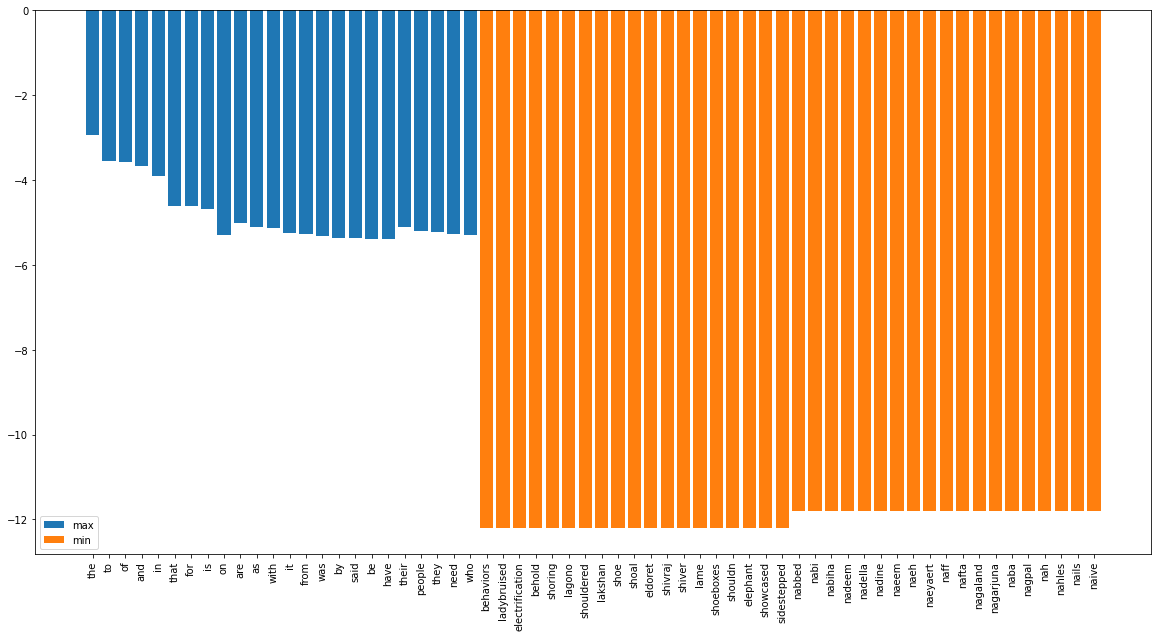

class:  1 pred:  0 text:  [array(['alone', 'anywhere', 'be', 'do', 'in', 'let', 'many', 'refugees',
       'resettled', 'the', 'to', 'us', 'want'], dtype='<U20')]
accuracy:  0.8424821002386634
F1 score:  0.41071428571428575
class  0
class  1


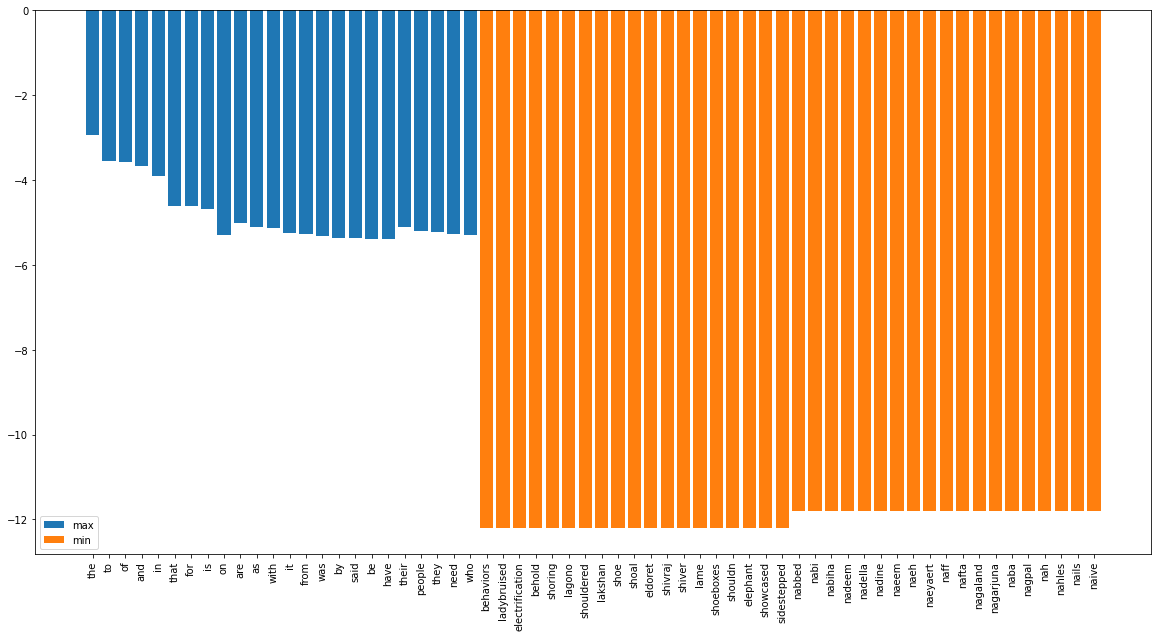

class:  0 pred:  1 text:  [array(['able', 'be', 'could', 'he', 'help', 'in', 'last', 'liked', 'lim',
       'ms', 'need', 'people', 'said', 'so', 'someone', 'the', 'this',
       'thought', 'time', 'to'], dtype='<U20')]
+++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++
['00' '000' '000m' ... 'zuma' 'zuri' 'zyngier']
accuracy:  0.8385864374403056
F1 score:  0.3474903474903475
class  0
class  1


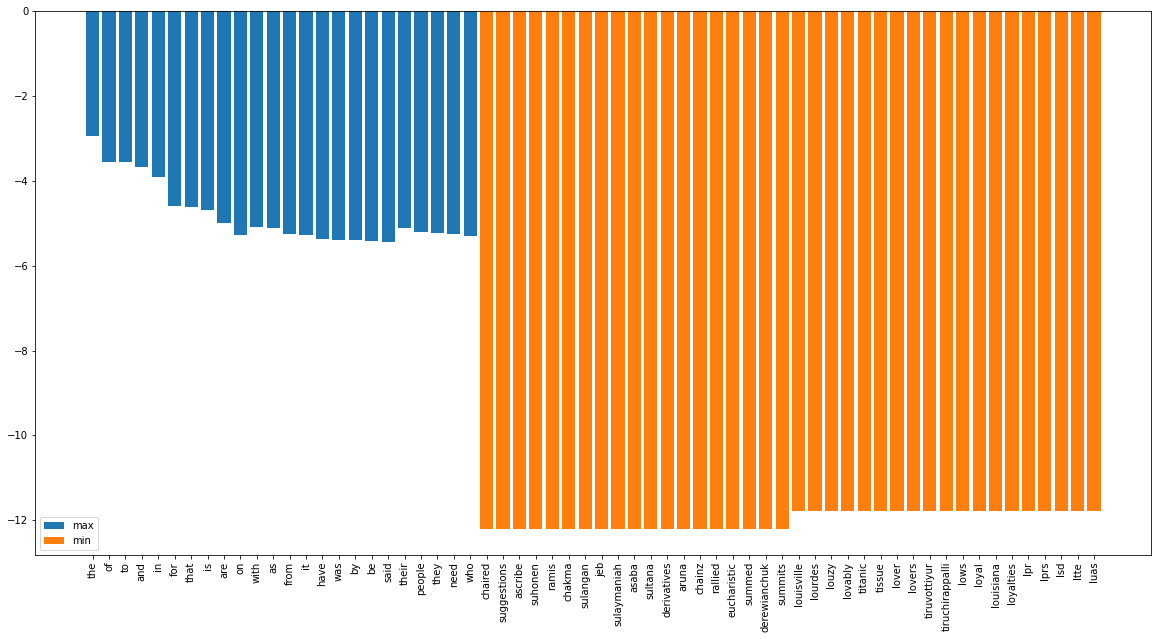

class:  1 pred:  0 text:  [array(['90', 'adding', 'and', 'another', 'apart', 'area', 'as', 'can',
       'concern', 'confined', 'constituency', 'degree', 'economic',
       'flyover', 'for', 'from', 'group', 'he', 'high', 'him', 'his',
       'homeless', 'improve', 'in', 'is', 'it', 'major', 'my', 'not',
       'of', 'on', 'one', 'pavements', 'people', 'public', 'rise', 'said',
       'schools', 'see', 'sleep', 'socio', 'standard', 'that', 'the',
       'to', 'underneath', 'view', 'water', 'while', 'you'], dtype='<U20')]
accuracy:  0.8496420047732697
F1 score:  0.4473684210526315
class  0
class  1


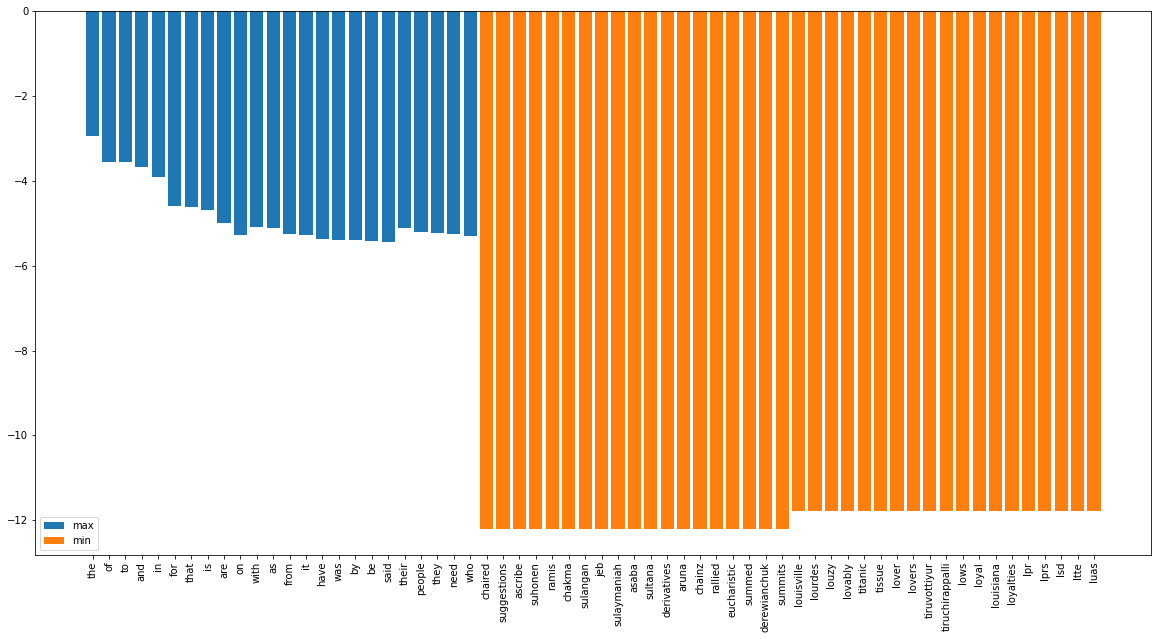

class:  0 pred:  1 text:  [array(['able', 'be', 'could', 'he', 'help', 'in', 'last', 'liked', 'lim',
       'ms', 'need', 'people', 'said', 'so', 'someone', 'the', 'this',
       'thought', 'time', 'to'], dtype='<U20')]
+++++++++++++++++++++++++++++


In [361]:
for i in range(num_sub_datasets):
    X_train, y_train = train_data_list[i]['text'], train_data_list[i]['label']
    print("+++++++++++++++++++++++++++++")
    NB(X_train, y_train, X_test, y_test, X_val, y_val, cv)
    print("+++++++++++++++++++++++++++++")

In [362]:
def trains(X_train, y_train, cv, model):
    bow = cv.fit_transform(X_train)
    model.fit(bow, y_train)
    # test
    # print("accuracy: ", model.score(test_bow, y_test))
    # F1 score
    # from sklearn.metrics import f1_score
    # print("F1 score: ", f1_score(y_test, y_pred))
    return model

In [363]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [364]:
def bagging(X_train, y_train, X_test, y_test, X_val, y_val, cv, modellists):
    models = []
    for i in modellists:
        t = trains(X_train, y_train, cv, i)
        models.append(t)
    # predict
    test_bow = cv.transform(X_test)
    y_pred = []
    for i in models:
        y_pred.append(i.predict(test_bow))
    y_pred = np.array(y_pred)
    y_pred = np.sum(y_pred, axis=0)
    y_pred = np.where(y_pred > 2, 1, 0)
    # print(y_pred)
    # print(y_test)
    
    print("accuracy: ", accuracy_score(y_test, y_pred))
    # F1 score
    print("F1 score: ", f1_score(y_test, y_pred))
    y_pred = []
    for i in models:
        y_pred.append(i.predict(cv.transform(X_val)))
    y_pred = np.array(y_pred)
    y_pred = np.sum(y_pred, axis=0)
    y_pred = np.where(y_pred > 2, 1, 0)
    print("accuracy: ", accuracy_score(y_val, y_pred))
    # F1 score
    print("F1 score: ", f1_score(y_val, y_pred))




        

In [365]:
modelists = [MultinomialNB(), MultinomialNB(), MultinomialNB(), MultinomialNB(), MultinomialNB()]
bagging(X_train, y_train, X_test, y_test, X_val, y_val, cv, modelists)

accuracy:  0.8385864374403056
F1 score:  0.3474903474903475
accuracy:  0.8496420047732697
F1 score:  0.4473684210526315
